In [1]:
import torch
import torchvision

import torch.utils.tensorboard as tb

from PIL import Image

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

import matplotlib.pyplot as plt
import pandas as pd

LABEL_NAMES = {'background':0, 'kart':1, 'pickup':2, 'nitro':3, 'bomb':4, 'projectile':5}

LABEL_=['background','kart','pickup','nitro','bomb','projectile']

## Reading Data

In [11]:
# upload the data and unzip it. You will see data/ with train/ and valid/. 
!unzip supertux_classification_trainval.zip

Archive:  supertux_classification_trainval.zip
   creating: data/train/
  inflating: data/train/15177.jpg    
  inflating: data/train/02271.jpg    
  inflating: data/train/03093.jpg    
  inflating: data/train/14509.jpg    
  inflating: data/train/01128.jpg    
  inflating: data/train/13820.jpg    
  inflating: data/train/19888.jpg    
  inflating: data/train/04807.jpg    
  inflating: data/train/08513.jpg    
  inflating: data/train/01029.jpg    
  inflating: data/train/14261.jpg    
  inflating: data/train/08158.jpg    
  inflating: data/train/08798.jpg    
  inflating: data/train/00966.jpg    
  inflating: data/train/17977.jpg    
  inflating: data/train/09375.jpg    
  inflating: data/train/00818.jpg    
  inflating: data/train/06356.jpg    
  inflating: data/train/04688.jpg    
  inflating: data/train/20018.jpg    
  inflating: data/train/09505.jpg    
  inflating: data/train/15185.jpg    
  inflating: data/train/17749.jpg    
  inflating: data/train/13988.jpg    
  inflating: dat

  inflating: data/train/02922.jpg    
  inflating: data/train/10020.jpg    
  inflating: data/train/15026.jpg    
  inflating: data/train/19369.jpg    
  inflating: data/train/15936.jpg    
  inflating: data/train/02500.jpg    
  inflating: data/train/09227.jpg    
  inflating: data/train/12713.jpg    
  inflating: data/train/11103.jpg    
  inflating: data/train/02679.jpg    
  inflating: data/train/19537.jpg    
  inflating: data/train/05570.jpg    
  inflating: data/train/06537.jpg    
  inflating: data/train/06562.jpg    
  inflating: data/train/06513.jpg    
  inflating: data/train/03520.jpg    
  inflating: data/train/04173.jpg    
  inflating: data/train/12666.jpg    
  inflating: data/train/14245.jpg    
  inflating: data/train/11020.jpg    
  inflating: data/train/04177.jpg    
  inflating: data/train/11107.jpg    
  inflating: data/train/14151.jpg    
  inflating: data/train/13629.jpg    
  inflating: data/train/18654.jpg    
  inflating: data/train/13523.jpg    
  inflating:

  inflating: data/train/01838.jpg    
  inflating: data/train/14892.jpg    
  inflating: data/train/17174.jpg    
  inflating: data/train/19135.jpg    
  inflating: data/train/16804.jpg    
  inflating: data/train/17398.jpg    
  inflating: data/train/08923.jpg    
  inflating: data/train/01082.jpg    
  inflating: data/train/16259.jpg    
  inflating: data/train/17299.jpg    
  inflating: data/train/04574.jpg    
  inflating: data/train/03939.jpg    
  inflating: data/train/13042.jpg    
  inflating: data/train/10429.jpg    
  inflating: data/train/11115.jpg    
  inflating: data/train/06767.jpg    
  inflating: data/train/14168.jpg    
  inflating: data/train/14879.jpg    
  inflating: data/train/00869.jpg    
  inflating: data/train/14114.jpg    
  inflating: data/train/09808.jpg    
  inflating: data/train/16140.jpg    
  inflating: data/train/08626.jpg    
  inflating: data/train/10526.jpg    
  inflating: data/train/14436.jpg    
  inflating: data/train/20578.jpg    
  inflating:

  inflating: data/train/10749.jpg    
  inflating: data/train/17912.jpg    
  inflating: data/train/18552.jpg    
  inflating: data/train/03166.jpg    
  inflating: data/train/04501.jpg    
  inflating: data/train/05644.jpg    
  inflating: data/train/09708.jpg    
  inflating: data/train/05630.jpg    
  inflating: data/train/02168.jpg    
  inflating: data/train/16733.jpg    
  inflating: data/train/18777.jpg    
  inflating: data/train/18947.jpg    
  inflating: data/train/07209.jpg    
  inflating: data/train/16069.jpg    
  inflating: data/train/13254.jpg    
  inflating: data/train/03887.jpg    
  inflating: data/train/01339.jpg    
  inflating: data/train/03216.jpg    
  inflating: data/train/09699.jpg    
  inflating: data/train/17612.jpg    
  inflating: data/train/14812.jpg    
  inflating: data/train/15085.jpg    
  inflating: data/train/05335.jpg    
  inflating: data/train/04767.jpg    
  inflating: data/train/10111.jpg    
  inflating: data/train/15219.jpg    
  inflating:

  inflating: data/train/04389.jpg    
  inflating: data/train/01654.jpg    
  inflating: data/train/11528.jpg    
  inflating: data/train/01774.jpg    
  inflating: data/train/11580.jpg    
  inflating: data/train/00697.jpg    
  inflating: data/train/16546.jpg    
  inflating: data/train/12919.jpg    
  inflating: data/train/04725.jpg    
  inflating: data/train/13264.jpg    
  inflating: data/train/12878.jpg    
  inflating: data/train/14755.jpg    
  inflating: data/train/09829.jpg    
  inflating: data/train/05906.jpg    
  inflating: data/train/00361.jpg    
  inflating: data/train/12667.jpg    
  inflating: data/train/01617.jpg    
  inflating: data/train/09683.jpg    
  inflating: data/train/01442.jpg    
  inflating: data/train/14806.jpg    
  inflating: data/train/17609.jpg    
  inflating: data/train/18030.jpg    
  inflating: data/train/10650.jpg    
  inflating: data/train/16776.jpg    
  inflating: data/train/16523.jpg    
  inflating: data/train/15022.jpg    
  inflating:

  inflating: data/train/11451.jpg    
  inflating: data/train/14626.jpg    
  inflating: data/train/09616.jpg    
  inflating: data/train/07701.jpg    
  inflating: data/train/13178.jpg    
  inflating: data/train/15700.jpg    
  inflating: data/train/16900.jpg    
  inflating: data/train/13308.jpg    
  inflating: data/train/16460.jpg    
  inflating: data/train/10672.jpg    
  inflating: data/train/12795.jpg    
  inflating: data/train/11426.jpg    
  inflating: data/train/08888.jpg    
  inflating: data/train/16737.jpg    
  inflating: data/train/09786.jpg    
  inflating: data/train/19735.jpg    
  inflating: data/train/20590.jpg    
  inflating: data/train/13848.jpg    
  inflating: data/train/03226.jpg    
  inflating: data/train/17559.jpg    
  inflating: data/train/03679.jpg    
  inflating: data/train/02180.jpg    
  inflating: data/train/20256.jpg    
  inflating: data/train/09451.jpg    
  inflating: data/train/09446.jpg    
  inflating: data/train/07664.jpg    
  inflating:

  inflating: data/train/19382.jpg    
  inflating: data/train/17677.jpg    
  inflating: data/train/02155.jpg    
  inflating: data/train/08754.jpg    
  inflating: data/train/10002.jpg    
  inflating: data/train/01999.jpg    
  inflating: data/train/00217.jpg    
  inflating: data/train/07526.jpg    
  inflating: data/train/02109.jpg    
  inflating: data/train/19907.jpg    
  inflating: data/train/07331.jpg    
  inflating: data/train/16957.jpg    
  inflating: data/train/05862.jpg    
  inflating: data/train/16544.jpg    
  inflating: data/train/17212.jpg    
  inflating: data/train/08655.jpg    
  inflating: data/train/20672.jpg    
  inflating: data/train/13191.jpg    
  inflating: data/train/13595.jpg    
  inflating: data/train/03537.jpg    
  inflating: data/train/08796.jpg    
  inflating: data/train/03236.jpg    
  inflating: data/train/02911.jpg    
  inflating: data/train/20735.jpg    
  inflating: data/train/18249.jpg    
  inflating: data/train/11864.jpg    
  inflating:

  inflating: data/train/17175.jpg    
  inflating: data/train/04206.jpg    
  inflating: data/train/16046.jpg    
  inflating: data/train/12494.jpg    
  inflating: data/train/06961.jpg    
  inflating: data/train/20837.jpg    
  inflating: data/train/08065.jpg    
  inflating: data/train/14346.jpg    
  inflating: data/train/06811.jpg    
  inflating: data/train/20888.jpg    
  inflating: data/train/20755.jpg    
  inflating: data/train/08724.jpg    
  inflating: data/train/04768.jpg    
  inflating: data/train/19085.jpg    
  inflating: data/train/05426.jpg    
  inflating: data/train/07015.jpg    
  inflating: data/train/15951.jpg    
  inflating: data/train/08462.jpg    
  inflating: data/train/06554.jpg    
  inflating: data/train/09659.jpg    
  inflating: data/train/13931.jpg    
  inflating: data/train/05825.jpg    
  inflating: data/train/03894.jpg    
  inflating: data/train/10534.jpg    
  inflating: data/train/07161.jpg    
  inflating: data/train/14763.jpg    
  inflating:

  inflating: data/train/15497.jpg    
  inflating: data/train/20841.jpg    
  inflating: data/train/03296.jpg    
  inflating: data/train/19374.jpg    
  inflating: data/train/13756.jpg    
  inflating: data/train/02076.jpg    
  inflating: data/train/09958.jpg    
  inflating: data/train/12553.jpg    
  inflating: data/train/04903.jpg    
  inflating: data/train/06787.jpg    
  inflating: data/train/16785.jpg    
  inflating: data/train/20462.jpg    
  inflating: data/train/11302.jpg    
  inflating: data/train/18418.jpg    
  inflating: data/train/09827.jpg    
  inflating: data/train/20728.jpg    
  inflating: data/train/20586.jpg    
  inflating: data/train/04944.jpg    
  inflating: data/train/06962.jpg    
  inflating: data/train/01813.jpg    
  inflating: data/train/18290.jpg    
  inflating: data/train/13183.jpg    
  inflating: data/train/14470.jpg    
  inflating: data/train/20274.jpg    
  inflating: data/train/09000.jpg    
  inflating: data/train/15231.jpg    
  inflating:

  inflating: data/train/02490.jpg    
  inflating: data/train/20864.jpg    
  inflating: data/train/00112.jpg    
  inflating: data/train/05903.jpg    
  inflating: data/train/05054.jpg    
  inflating: data/train/05508.jpg    
  inflating: data/train/15650.jpg    
  inflating: data/train/02660.jpg    
  inflating: data/train/01597.jpg    
  inflating: data/train/04627.jpg    
  inflating: data/train/12168.jpg    
  inflating: data/train/17629.jpg    
  inflating: data/train/08419.jpg    
  inflating: data/train/05881.jpg    
  inflating: data/train/06158.jpg    
  inflating: data/train/05357.jpg    
  inflating: data/train/08081.jpg    
  inflating: data/train/06519.jpg    
  inflating: data/train/17923.jpg    
  inflating: data/train/20736.jpg    
  inflating: data/train/05206.jpg    
  inflating: data/train/01225.jpg    
  inflating: data/train/01723.jpg    
  inflating: data/train/19580.jpg    
  inflating: data/train/06812.jpg    
  inflating: data/train/02924.jpg    
  inflating:

  inflating: data/train/03752.jpg    
  inflating: data/train/11487.jpg    
  inflating: data/train/20805.jpg    
  inflating: data/train/02139.jpg    
  inflating: data/train/15004.jpg    
  inflating: data/train/10053.jpg    
  inflating: data/train/04527.jpg    
  inflating: data/train/09661.jpg    
  inflating: data/train/19548.jpg    
  inflating: data/train/02675.jpg    
  inflating: data/train/20868.jpg    
  inflating: data/train/01464.jpg    
  inflating: data/train/08378.jpg    
  inflating: data/train/00537.jpg    
  inflating: data/train/19955.jpg    
  inflating: data/train/12780.jpg    
  inflating: data/train/11157.jpg    
  inflating: data/train/10616.jpg    
  inflating: data/train/19064.jpg    
  inflating: data/train/11980.jpg    
  inflating: data/train/11518.jpg    
  inflating: data/train/08347.jpg    
  inflating: data/train/05182.jpg    
  inflating: data/train/20258.jpg    
  inflating: data/train/04436.jpg    
  inflating: data/train/00528.jpg    
  inflating:

  inflating: data/train/03744.jpg    
  inflating: data/train/04240.jpg    
  inflating: data/train/19251.jpg    
  inflating: data/train/04604.jpg    
  inflating: data/train/16866.jpg    
  inflating: data/train/03470.jpg    
  inflating: data/train/08540.jpg    
  inflating: data/train/07067.jpg    
  inflating: data/train/02624.jpg    
  inflating: data/train/11437.jpg    
  inflating: data/train/17434.jpg    
  inflating: data/train/06204.jpg    
  inflating: data/train/04233.jpg    
  inflating: data/train/16257.jpg    
  inflating: data/train/15559.jpg    
  inflating: data/train/02260.jpg    
  inflating: data/train/15487.jpg    
  inflating: data/train/05839.jpg    
  inflating: data/train/00157.jpg    
  inflating: data/train/13842.jpg    
  inflating: data/train/06277.jpg    
  inflating: data/train/05420.jpg    
  inflating: data/train/05913.jpg    
  inflating: data/train/05082.jpg    
  inflating: data/train/12716.jpg    
  inflating: data/train/18677.jpg    
  inflating:

  inflating: data/train/05584.jpg    
  inflating: data/train/18411.jpg    
  inflating: data/train/08941.jpg    
  inflating: data/train/17339.jpg    
  inflating: data/train/19063.jpg    
  inflating: data/train/03348.jpg    
  inflating: data/train/14813.jpg    
  inflating: data/train/10156.jpg    
  inflating: data/train/12727.jpg    
  inflating: data/train/07677.jpg    
  inflating: data/train/10790.jpg    
  inflating: data/train/05959.jpg    
  inflating: data/train/06590.jpg    
  inflating: data/train/16011.jpg    
  inflating: data/train/01605.jpg    
  inflating: data/train/08021.jpg    
  inflating: data/train/04710.jpg    
  inflating: data/train/05909.jpg    
  inflating: data/train/17431.jpg    
  inflating: data/train/07592.jpg    
  inflating: data/train/02709.jpg    
  inflating: data/train/09915.jpg    
  inflating: data/train/18825.jpg    
  inflating: data/train/10872.jpg    
  inflating: data/train/04304.jpg    
  inflating: data/train/02589.jpg    
  inflating:

  inflating: data/train/05336.jpg    
  inflating: data/train/07841.jpg    
  inflating: data/train/04208.jpg    
  inflating: data/train/18499.jpg    
  inflating: data/train/00098.jpg    
  inflating: data/train/16218.jpg    
  inflating: data/train/12935.jpg    
  inflating: data/train/20247.jpg    
  inflating: data/train/14093.jpg    
  inflating: data/train/06991.jpg    
  inflating: data/train/17584.jpg    
  inflating: data/train/03942.jpg    
  inflating: data/train/15836.jpg    
  inflating: data/train/08022.jpg    
  inflating: data/train/13176.jpg    
  inflating: data/train/13475.jpg    
  inflating: data/train/06589.jpg    
  inflating: data/train/03625.jpg    
  inflating: data/train/16045.jpg    
  inflating: data/train/14827.jpg    
  inflating: data/train/20800.jpg    
  inflating: data/train/10865.jpg    
  inflating: data/train/07352.jpg    
  inflating: data/train/19997.jpg    
  inflating: data/train/11535.jpg    
  inflating: data/train/08236.jpg    
  inflating:

  inflating: data/train/15818.jpg    
  inflating: data/train/09665.jpg    
  inflating: data/train/18748.jpg    
  inflating: data/train/14448.jpg    
  inflating: data/train/14709.jpg    
  inflating: data/train/13181.jpg    
  inflating: data/train/04230.jpg    
  inflating: data/train/17197.jpg    
  inflating: data/train/15233.jpg    
  inflating: data/train/00632.jpg    
  inflating: data/train/18453.jpg    
  inflating: data/train/06731.jpg    
  inflating: data/train/11118.jpg    
  inflating: data/train/06764.jpg    
  inflating: data/train/09144.jpg    
  inflating: data/train/16806.jpg    
  inflating: data/train/08570.jpg    
  inflating: data/train/20716.jpg    
  inflating: data/train/20976.jpg    
  inflating: data/train/05670.jpg    
  inflating: data/train/10342.jpg    
  inflating: data/train/00445.jpg    
  inflating: data/train/12585.jpg    
  inflating: data/train/06749.jpg    
  inflating: data/train/18363.jpg    
  inflating: data/train/07503.jpg    
  inflating:

  inflating: data/train/15206.jpg    
  inflating: data/train/10473.jpg    
  inflating: data/train/10190.jpg    
  inflating: data/train/08222.jpg    
  inflating: data/train/11260.jpg    
  inflating: data/train/03876.jpg    
  inflating: data/train/08642.jpg    
  inflating: data/train/15799.jpg    
  inflating: data/train/05648.jpg    
  inflating: data/train/02661.jpg    
  inflating: data/train/19887.jpg    
  inflating: data/train/10068.jpg    
  inflating: data/train/00590.jpg    
  inflating: data/train/19784.jpg    
  inflating: data/train/08757.jpg    
  inflating: data/train/20366.jpg    
  inflating: data/train/03139.jpg    
  inflating: data/train/06106.jpg    
  inflating: data/train/13217.jpg    
  inflating: data/train/08248.jpg    
  inflating: data/train/17736.jpg    
  inflating: data/train/20842.jpg    
  inflating: data/train/20339.jpg    
  inflating: data/train/11064.jpg    
  inflating: data/train/10212.jpg    
  inflating: data/train/12408.jpg    
  inflating:

  inflating: data/train/15873.jpg    
  inflating: data/train/11805.jpg    
  inflating: data/train/10460.jpg    
  inflating: data/train/07687.jpg    
  inflating: data/train/17384.jpg    
  inflating: data/train/04528.jpg    
  inflating: data/train/14268.jpg    
  inflating: data/train/03647.jpg    
  inflating: data/train/04922.jpg    
  inflating: data/train/07886.jpg    
  inflating: data/train/16809.jpg    
  inflating: data/train/10940.jpg    
  inflating: data/train/05381.jpg    
  inflating: data/train/16055.jpg    
  inflating: data/train/19263.jpg    
  inflating: data/train/17394.jpg    
  inflating: data/train/17988.jpg    
  inflating: data/train/10014.jpg    
  inflating: data/train/09417.jpg    
  inflating: data/train/10311.jpg    
  inflating: data/train/17618.jpg    
  inflating: data/train/11820.jpg    
  inflating: data/train/00482.jpg    
  inflating: data/train/11780.jpg    
  inflating: data/train/18402.jpg    
  inflating: data/train/06408.jpg    
  inflating:

  inflating: data/train/09217.jpg    
  inflating: data/train/02527.jpg    
  inflating: data/train/06016.jpg    
  inflating: data/train/11878.jpg    
  inflating: data/train/18394.jpg    
  inflating: data/train/17775.jpg    
  inflating: data/train/00042.jpg    
  inflating: data/train/02236.jpg    
  inflating: data/train/05148.jpg    
  inflating: data/train/04095.jpg    
  inflating: data/train/08804.jpg    
  inflating: data/train/16911.jpg    
  inflating: data/train/02450.jpg    
  inflating: data/train/20773.jpg    
  inflating: data/train/11247.jpg    
  inflating: data/train/16540.jpg    
  inflating: data/train/02383.jpg    
  inflating: data/train/05125.jpg    
  inflating: data/train/13782.jpg    
  inflating: data/train/19827.jpg    
  inflating: data/train/14765.jpg    
  inflating: data/train/08343.jpg    
  inflating: data/train/15124.jpg    
  inflating: data/train/10435.jpg    
  inflating: data/train/02399.jpg    
  inflating: data/train/04154.jpg    
  inflating:

  inflating: data/train/13679.jpg    
  inflating: data/train/05409.jpg    
  inflating: data/train/10690.jpg    
  inflating: data/train/12613.jpg    
  inflating: data/train/04921.jpg    
  inflating: data/train/01915.jpg    
  inflating: data/train/03684.jpg    
  inflating: data/train/09374.jpg    
  inflating: data/train/04275.jpg    
  inflating: data/train/11290.jpg    
  inflating: data/train/17940.jpg    
  inflating: data/train/05353.jpg    
  inflating: data/train/00400.jpg    
  inflating: data/train/06614.jpg    
  inflating: data/train/12000.jpg    
  inflating: data/train/06455.jpg    
  inflating: data/train/01310.jpg    
  inflating: data/train/16263.jpg    
  inflating: data/train/15346.jpg    
  inflating: data/train/10665.jpg    
  inflating: data/train/01770.jpg    
  inflating: data/train/15129.jpg    
  inflating: data/train/01760.jpg    
  inflating: data/train/17661.jpg    
  inflating: data/train/18327.jpg    
  inflating: data/train/09044.jpg    
  inflating:

  inflating: data/train/14441.jpg    
  inflating: data/train/20532.jpg    
  inflating: data/train/18357.jpg    
  inflating: data/train/00729.jpg    
  inflating: data/train/13945.jpg    
  inflating: data/train/20898.jpg    
  inflating: data/train/18260.jpg    
  inflating: data/train/00555.jpg    
  inflating: data/train/13337.jpg    
  inflating: data/train/12831.jpg    
  inflating: data/train/07567.jpg    
  inflating: data/train/12944.jpg    
  inflating: data/train/10836.jpg    
  inflating: data/train/16439.jpg    
  inflating: data/train/04927.jpg    
  inflating: data/train/00908.jpg    
  inflating: data/train/19889.jpg    
  inflating: data/train/04366.jpg    
  inflating: data/train/08220.jpg    
  inflating: data/train/15784.jpg    
  inflating: data/train/07411.jpg    
  inflating: data/train/17696.jpg    
  inflating: data/train/02159.jpg    
  inflating: data/train/06116.jpg    
  inflating: data/train/13078.jpg    
  inflating: data/train/03532.jpg    
  inflating:

  inflating: data/train/03973.jpg    
  inflating: data/train/04363.jpg    
  inflating: data/train/16469.jpg    
  inflating: data/train/01409.jpg    
  inflating: data/train/12060.jpg    
  inflating: data/train/06635.jpg    
  inflating: data/train/07500.jpg    
  inflating: data/train/13984.jpg    
  inflating: data/train/09619.jpg    
  inflating: data/train/19546.jpg    
  inflating: data/train/10083.jpg    
  inflating: data/train/11608.jpg    
  inflating: data/train/12256.jpg    
  inflating: data/train/18364.jpg    
  inflating: data/train/18271.jpg    
  inflating: data/train/11111.jpg    
  inflating: data/train/04910.jpg    
  inflating: data/train/15259.jpg    
  inflating: data/train/19758.jpg    
  inflating: data/train/07255.jpg    
  inflating: data/train/08641.jpg    
  inflating: data/train/17577.jpg    
  inflating: data/train/04312.jpg    
  inflating: data/train/19145.jpg    
  inflating: data/train/00912.jpg    
  inflating: data/train/00549.jpg    
  inflating:

  inflating: data/train/18347.jpg    
  inflating: data/train/19715.jpg    
  inflating: data/train/02707.jpg    
  inflating: data/train/15084.jpg    
  inflating: data/train/10955.jpg    
  inflating: data/train/05852.jpg    
  inflating: data/train/01557.jpg    
  inflating: data/train/06459.jpg    
  inflating: data/train/15756.jpg    
  inflating: data/train/12218.jpg    
  inflating: data/train/01974.jpg    
  inflating: data/train/19915.jpg    
  inflating: data/train/19314.jpg    
  inflating: data/train/01247.jpg    
  inflating: data/train/20091.jpg    
  inflating: data/train/19575.jpg    
  inflating: data/train/08936.jpg    
  inflating: data/train/04361.jpg    
  inflating: data/train/07096.jpg    
  inflating: data/train/09520.jpg    
  inflating: data/train/15417.jpg    
  inflating: data/train/15174.jpg    
  inflating: data/train/04290.jpg    
  inflating: data/train/19850.jpg    
  inflating: data/train/13133.jpg    
  inflating: data/train/15262.jpg    
  inflating:

  inflating: data/train/02984.jpg    
  inflating: data/train/20966.jpg    
  inflating: data/train/19168.jpg    
  inflating: data/train/16488.jpg    
  inflating: data/train/18800.jpg    
  inflating: data/train/01093.jpg    
  inflating: data/train/08160.jpg    
  inflating: data/train/00778.jpg    
  inflating: data/train/00026.jpg    
  inflating: data/train/10708.jpg    
  inflating: data/train/20789.jpg    
  inflating: data/train/04116.jpg    
  inflating: data/train/04648.jpg    
  inflating: data/train/03318.jpg    
  inflating: data/train/03742.jpg    
  inflating: data/train/16442.jpg    
  inflating: data/train/08585.jpg    
  inflating: data/train/13573.jpg    
  inflating: data/train/16884.jpg    
  inflating: data/train/04825.jpg    
  inflating: data/train/02276.jpg    
  inflating: data/train/13530.jpg    
  inflating: data/train/20731.jpg    
  inflating: data/train/01495.jpg    
  inflating: data/train/20527.jpg    
  inflating: data/train/10689.jpg    
  inflating:

  inflating: data/train/10236.jpg    
  inflating: data/train/05361.jpg    
  inflating: data/train/00064.jpg    
  inflating: data/train/11244.jpg    
  inflating: data/train/00628.jpg    
  inflating: data/train/06011.jpg    
  inflating: data/train/16690.jpg    
  inflating: data/train/04380.jpg    
  inflating: data/train/09572.jpg    
  inflating: data/train/08146.jpg    
  inflating: data/train/19674.jpg    
  inflating: data/train/18028.jpg    
  inflating: data/train/05117.jpg    
  inflating: data/train/09325.jpg    
  inflating: data/train/02741.jpg    
  inflating: data/train/01954.jpg    
  inflating: data/train/12974.jpg    
  inflating: data/train/18280.jpg    
  inflating: data/train/00556.jpg    
  inflating: data/train/13419.jpg    
  inflating: data/train/20287.jpg    
  inflating: data/train/04212.jpg    
  inflating: data/train/10176.jpg    
  inflating: data/train/06102.jpg    
  inflating: data/train/09889.jpg    
  inflating: data/train/02292.jpg    
  inflating:

  inflating: data/train/09721.jpg    
  inflating: data/train/17147.jpg    
  inflating: data/train/18919.jpg    
  inflating: data/train/13450.jpg    
  inflating: data/train/06832.jpg    
  inflating: data/train/18955.jpg    
  inflating: data/train/17801.jpg    
  inflating: data/train/05122.jpg    
  inflating: data/train/09128.jpg    
  inflating: data/train/07635.jpg    
  inflating: data/train/04089.jpg    
  inflating: data/train/08340.jpg    
  inflating: data/train/13923.jpg    
  inflating: data/train/04579.jpg    
  inflating: data/train/04969.jpg    
  inflating: data/train/03832.jpg    
  inflating: data/train/19517.jpg    
  inflating: data/train/00004.jpg    
  inflating: data/train/12467.jpg    
  inflating: data/train/03240.jpg    
  inflating: data/train/13404.jpg    
  inflating: data/train/03389.jpg    
  inflating: data/train/17505.jpg    
  inflating: data/train/12880.jpg    
  inflating: data/train/08070.jpg    
  inflating: data/train/11468.jpg    
  inflating:

  inflating: data/train/13710.jpg    
  inflating: data/train/14699.jpg    
  inflating: data/train/20698.jpg    
  inflating: data/train/14493.jpg    
  inflating: data/train/04382.jpg    
  inflating: data/train/06817.jpg    
  inflating: data/train/03015.jpg    
  inflating: data/train/08567.jpg    
  inflating: data/train/10992.jpg    
  inflating: data/train/11370.jpg    
  inflating: data/train/14495.jpg    
  inflating: data/train/14838.jpg    
  inflating: data/train/01705.jpg    
  inflating: data/train/09678.jpg    
  inflating: data/train/02151.jpg    
  inflating: data/train/02734.jpg    
  inflating: data/train/10861.jpg    
  inflating: data/train/09941.jpg    
  inflating: data/train/04551.jpg    
  inflating: data/train/03461.jpg    
  inflating: data/train/15707.jpg    
  inflating: data/train/04282.jpg    
  inflating: data/train/12514.jpg    
  inflating: data/train/05734.jpg    
  inflating: data/train/06218.jpg    
  inflating: data/train/13394.jpg    
  inflating:

  inflating: data/train/05128.jpg    
  inflating: data/train/20153.jpg    
  inflating: data/train/17104.jpg    
  inflating: data/train/04788.jpg    
  inflating: data/train/13448.jpg    
  inflating: data/train/11836.jpg    
  inflating: data/train/10846.jpg    
  inflating: data/train/02020.jpg    
  inflating: data/train/18842.jpg    
  inflating: data/train/17659.jpg    
  inflating: data/train/12085.jpg    
  inflating: data/train/07803.jpg    
  inflating: data/train/02769.jpg    
  inflating: data/train/05669.jpg    
  inflating: data/train/12246.jpg    
  inflating: data/train/06641.jpg    
  inflating: data/train/03095.jpg    
  inflating: data/train/12038.jpg    
  inflating: data/train/09178.jpg    
  inflating: data/train/12161.jpg    
  inflating: data/train/11942.jpg    
  inflating: data/train/06088.jpg    
  inflating: data/train/13110.jpg    
  inflating: data/train/10371.jpg    
  inflating: data/train/19679.jpg    
  inflating: data/train/13177.jpg    
  inflating:

  inflating: data/train/07755.jpg    
  inflating: data/train/09386.jpg    
  inflating: data/train/17011.jpg    
  inflating: data/train/03743.jpg    
  inflating: data/train/18863.jpg    
  inflating: data/train/00337.jpg    
  inflating: data/train/03971.jpg    
  inflating: data/train/20205.jpg    
  inflating: data/train/12126.jpg    
  inflating: data/train/20737.jpg    
  inflating: data/train/13985.jpg    
  inflating: data/train/02846.jpg    
  inflating: data/train/05271.jpg    
  inflating: data/train/08271.jpg    
  inflating: data/train/12449.jpg    
  inflating: data/train/01313.jpg    
  inflating: data/train/10468.jpg    
  inflating: data/train/01347.jpg    
  inflating: data/train/18647.jpg    
  inflating: data/train/17355.jpg    
  inflating: data/train/04278.jpg    
  inflating: data/train/12682.jpg    
  inflating: data/train/17993.jpg    
  inflating: data/train/12847.jpg    
  inflating: data/train/04545.jpg    
  inflating: data/train/20633.jpg    
  inflating:

  inflating: data/train/02563.jpg    
  inflating: data/train/10155.jpg    
  inflating: data/train/03074.jpg    
  inflating: data/train/04266.jpg    
  inflating: data/train/04827.jpg    
  inflating: data/train/04766.jpg    
  inflating: data/train/08607.jpg    
  inflating: data/train/03596.jpg    
  inflating: data/train/11091.jpg    
  inflating: data/train/14555.jpg    
  inflating: data/train/16801.jpg    
  inflating: data/train/15940.jpg    
  inflating: data/train/07730.jpg    
  inflating: data/train/14757.jpg    
  inflating: data/train/03251.jpg    
  inflating: data/train/15389.jpg    
  inflating: data/train/05044.jpg    
  inflating: data/train/09930.jpg    
  inflating: data/train/15493.jpg    
  inflating: data/train/03712.jpg    
  inflating: data/train/16144.jpg    
  inflating: data/train/19449.jpg    
  inflating: data/train/19983.jpg    
  inflating: data/train/04994.jpg    
  inflating: data/train/00047.jpg    
  inflating: data/train/14573.jpg    
  inflating:

  inflating: data/train/14146.jpg    
  inflating: data/train/16893.jpg    
  inflating: data/train/19087.jpg    
  inflating: data/train/06510.jpg    
  inflating: data/train/09554.jpg    
  inflating: data/train/16219.jpg    
  inflating: data/train/07009.jpg    
  inflating: data/train/17341.jpg    
  inflating: data/train/01994.jpg    
  inflating: data/train/02553.jpg    
  inflating: data/train/13561.jpg    
  inflating: data/train/03409.jpg    
  inflating: data/train/04951.jpg    
  inflating: data/train/12099.jpg    
  inflating: data/train/03899.jpg    
  inflating: data/train/08399.jpg    
  inflating: data/train/04976.jpg    
  inflating: data/train/19231.jpg    
  inflating: data/train/18156.jpg    
  inflating: data/train/15250.jpg    
  inflating: data/train/17745.jpg    
  inflating: data/train/14754.jpg    
  inflating: data/train/16878.jpg    
  inflating: data/train/09415.jpg    
  inflating: data/train/12029.jpg    
  inflating: data/train/03215.jpg    
  inflating:

  inflating: data/train/16004.jpg    
  inflating: data/train/17754.jpg    
  inflating: data/train/02590.jpg    
  inflating: data/train/18537.jpg    
  inflating: data/train/01562.jpg    
  inflating: data/train/00686.jpg    
  inflating: data/train/20609.jpg    
  inflating: data/train/06771.jpg    
  inflating: data/train/02143.jpg    
  inflating: data/train/12580.jpg    
  inflating: data/train/09854.jpg    
  inflating: data/train/13418.jpg    
  inflating: data/train/16657.jpg    
  inflating: data/train/00699.jpg    
  inflating: data/train/17112.jpg    
  inflating: data/train/17324.jpg    
  inflating: data/train/09160.jpg    
  inflating: data/train/06975.jpg    
  inflating: data/train/14426.jpg    
  inflating: data/train/05076.jpg    
  inflating: data/train/00368.jpg    
  inflating: data/train/07005.jpg    
  inflating: data/train/07032.jpg    
  inflating: data/train/20871.jpg    
  inflating: data/train/18760.jpg    
  inflating: data/train/10533.jpg    
  inflating:

  inflating: data/train/10694.jpg    
  inflating: data/train/04339.jpg    
  inflating: data/train/12224.jpg    
  inflating: data/train/05281.jpg    
  inflating: data/train/13414.jpg    
  inflating: data/train/00078.jpg    
  inflating: data/train/14543.jpg    
  inflating: data/train/06579.jpg    
  inflating: data/train/04755.jpg    
  inflating: data/train/16593.jpg    
  inflating: data/train/17382.jpg    
  inflating: data/train/12568.jpg    
  inflating: data/train/13808.jpg    
  inflating: data/train/14456.jpg    
  inflating: data/train/01234.jpg    
  inflating: data/train/00407.jpg    
  inflating: data/train/00233.jpg    
  inflating: data/train/04804.jpg    
  inflating: data/train/19970.jpg    
  inflating: data/train/17713.jpg    
  inflating: data/train/20058.jpg    
  inflating: data/train/13155.jpg    
  inflating: data/train/20886.jpg    
  inflating: data/train/01618.jpg    
  inflating: data/train/12707.jpg    
  inflating: data/train/09272.jpg    
  inflating:

  inflating: data/train/10271.jpg    
  inflating: data/train/03642.jpg    
  inflating: data/train/04720.jpg    
  inflating: data/train/05752.jpg    
  inflating: data/train/18035.jpg    
  inflating: data/train/15973.jpg    
  inflating: data/train/05766.jpg    
  inflating: data/train/12792.jpg    
  inflating: data/train/09032.jpg    
  inflating: data/train/05620.jpg    
  inflating: data/train/08122.jpg    
  inflating: data/train/09122.jpg    
  inflating: data/train/07003.jpg    
  inflating: data/train/06207.jpg    
  inflating: data/train/10574.jpg    
  inflating: data/train/19775.jpg    
  inflating: data/train/12906.jpg    
  inflating: data/train/08049.jpg    
  inflating: data/train/01679.jpg    
  inflating: data/train/01794.jpg    
  inflating: data/train/18218.jpg    
  inflating: data/train/03989.jpg    
  inflating: data/train/07534.jpg    
  inflating: data/train/14694.jpg    
  inflating: data/train/07871.jpg    
  inflating: data/train/10850.jpg    
  inflating:

  inflating: data/train/18933.jpg    
  inflating: data/train/08521.jpg    
  inflating: data/train/08424.jpg    
  inflating: data/train/13886.jpg    
  inflating: data/train/17911.jpg    
  inflating: data/train/18495.jpg    
  inflating: data/train/03868.jpg    
  inflating: data/train/13452.jpg    
  inflating: data/train/01703.jpg    
  inflating: data/train/04360.jpg    
  inflating: data/train/16894.jpg    
  inflating: data/train/13312.jpg    
  inflating: data/train/02752.jpg    
  inflating: data/train/20834.jpg    
  inflating: data/train/03285.jpg    
  inflating: data/train/19940.jpg    
  inflating: data/train/09256.jpg    
  inflating: data/train/17364.jpg    
  inflating: data/train/01961.jpg    
  inflating: data/train/05094.jpg    
  inflating: data/train/19615.jpg    
  inflating: data/train/07408.jpg    
  inflating: data/train/19737.jpg    
  inflating: data/train/20179.jpg    
  inflating: data/train/04170.jpg    
  inflating: data/train/20315.jpg    
  inflating:

  inflating: data/train/13219.jpg    
  inflating: data/train/00862.jpg    
  inflating: data/train/16246.jpg    
  inflating: data/train/16648.jpg    
  inflating: data/train/19355.jpg    
  inflating: data/train/04050.jpg    
  inflating: data/train/09445.jpg    
  inflating: data/train/17529.jpg    
  inflating: data/train/07245.jpg    
  inflating: data/train/05623.jpg    
  inflating: data/train/14828.jpg    
  inflating: data/train/00055.jpg    
  inflating: data/train/15719.jpg    
  inflating: data/train/18703.jpg    
  inflating: data/train/09999.jpg    
  inflating: data/train/04748.jpg    
  inflating: data/train/01642.jpg    
  inflating: data/train/12571.jpg    
  inflating: data/train/03227.jpg    
  inflating: data/train/13366.jpg    
  inflating: data/train/18420.jpg    
  inflating: data/train/10800.jpg    
  inflating: data/train/12640.jpg    
  inflating: data/train/10568.jpg    
  inflating: data/train/11465.jpg    
  inflating: data/train/10337.jpg    
  inflating:

  inflating: data/train/10600.jpg    
  inflating: data/train/15733.jpg    
  inflating: data/train/15295.jpg    
  inflating: data/train/08144.jpg    
  inflating: data/train/03385.jpg    
  inflating: data/train/05210.jpg    
  inflating: data/train/06046.jpg    
  inflating: data/train/20631.jpg    
  inflating: data/train/16299.jpg    
  inflating: data/train/19103.jpg    
  inflating: data/train/19666.jpg    
  inflating: data/train/12183.jpg    
  inflating: data/train/17198.jpg    
  inflating: data/train/11887.jpg    
  inflating: data/train/06898.jpg    
  inflating: data/train/20660.jpg    
  inflating: data/train/10838.jpg    
  inflating: data/train/16880.jpg    
  inflating: data/train/03448.jpg    
  inflating: data/train/13014.jpg    
  inflating: data/train/05711.jpg    
  inflating: data/train/17514.jpg    
  inflating: data/train/03982.jpg    
  inflating: data/train/00138.jpg    
  inflating: data/train/00090.jpg    
  inflating: data/train/16132.jpg    
  inflating:

  inflating: data/train/10049.jpg    
  inflating: data/train/10399.jpg    
  inflating: data/train/09247.jpg    
  inflating: data/train/09009.jpg    
  inflating: data/train/00843.jpg    
  inflating: data/train/10500.jpg    
  inflating: data/train/12004.jpg    
  inflating: data/train/14530.jpg    
  inflating: data/train/11823.jpg    
  inflating: data/train/01032.jpg    
  inflating: data/train/16445.jpg    
  inflating: data/train/20870.jpg    
  inflating: data/train/01235.jpg    
  inflating: data/train/09136.jpg    
  inflating: data/train/16939.jpg    
  inflating: data/train/10891.jpg    
  inflating: data/train/10916.jpg    
  inflating: data/train/08141.jpg    
  inflating: data/train/12028.jpg    
  inflating: data/train/12562.jpg    
  inflating: data/train/12338.jpg    
  inflating: data/train/07516.jpg    
  inflating: data/train/01437.jpg    
  inflating: data/train/18470.jpg    
  inflating: data/train/12689.jpg    
  inflating: data/train/09248.jpg    
  inflating:

  inflating: data/train/05614.jpg    
  inflating: data/train/04429.jpg    
  inflating: data/train/13968.jpg    
  inflating: data/train/00563.jpg    
  inflating: data/train/15583.jpg    
  inflating: data/train/07583.jpg    
  inflating: data/train/20185.jpg    
  inflating: data/train/06994.jpg    
  inflating: data/train/17733.jpg    
  inflating: data/train/12201.jpg    
  inflating: data/train/11673.jpg    
  inflating: data/train/07063.jpg    
  inflating: data/train/15422.jpg    
  inflating: data/train/08165.jpg    
  inflating: data/train/20638.jpg    
  inflating: data/train/09184.jpg    
  inflating: data/train/07158.jpg    
  inflating: data/train/06226.jpg    
  inflating: data/train/07931.jpg    
  inflating: data/train/05537.jpg    
  inflating: data/train/07504.jpg    
  inflating: data/train/19584.jpg    
  inflating: data/train/00865.jpg    
  inflating: data/train/19902.jpg    
  inflating: data/train/14584.jpg    
  inflating: data/train/01777.jpg    
  inflating:

  inflating: data/train/05692.jpg    
  inflating: data/train/07182.jpg    
  inflating: data/train/04467.jpg    
  inflating: data/train/12633.jpg    
  inflating: data/train/04793.jpg    
  inflating: data/train/00293.jpg    
  inflating: data/train/01102.jpg    
  inflating: data/train/16640.jpg    
  inflating: data/train/00306.jpg    
  inflating: data/train/17442.jpg    
  inflating: data/train/06852.jpg    
  inflating: data/train/02282.jpg    
  inflating: data/train/08756.jpg    
  inflating: data/train/12790.jpg    
  inflating: data/train/13864.jpg    
  inflating: data/train/14760.jpg    
  inflating: data/train/11585.jpg    
  inflating: data/train/08652.jpg    
  inflating: data/train/03397.jpg    
  inflating: data/train/16454.jpg    
  inflating: data/train/13203.jpg    
  inflating: data/train/03499.jpg    
  inflating: data/train/06245.jpg    
  inflating: data/train/15223.jpg    
  inflating: data/train/17469.jpg    
  inflating: data/train/20497.jpg    
  inflating:

  inflating: data/train/13621.jpg    
  inflating: data/train/04838.jpg    
  inflating: data/train/01214.jpg    
  inflating: data/train/19006.jpg    
  inflating: data/train/19701.jpg    
  inflating: data/train/08380.jpg    
  inflating: data/train/04303.jpg    
  inflating: data/train/18661.jpg    
  inflating: data/train/11934.jpg    
  inflating: data/train/11007.jpg    
  inflating: data/train/12254.jpg    
  inflating: data/train/01684.jpg    
  inflating: data/train/10238.jpg    
  inflating: data/train/03865.jpg    
  inflating: data/train/12186.jpg    
  inflating: data/train/01052.jpg    
  inflating: data/train/20351.jpg    
  inflating: data/train/20791.jpg    
  inflating: data/train/18481.jpg    
  inflating: data/train/07453.jpg    
  inflating: data/train/13154.jpg    
  inflating: data/train/05960.jpg    
  inflating: data/train/01709.jpg    
  inflating: data/train/09608.jpg    
  inflating: data/train/09895.jpg    
  inflating: data/train/20538.jpg    
  inflating:

  inflating: data/train/18417.jpg    
  inflating: data/train/14643.jpg    
  inflating: data/train/12014.jpg    
  inflating: data/train/16967.jpg    
  inflating: data/train/08062.jpg    
  inflating: data/train/04229.jpg    
  inflating: data/train/17722.jpg    
  inflating: data/train/16907.jpg    
  inflating: data/train/18756.jpg    
  inflating: data/train/03885.jpg    
  inflating: data/train/13119.jpg    
  inflating: data/train/18857.jpg    
  inflating: data/train/20500.jpg    
  inflating: data/train/09449.jpg    
  inflating: data/train/17691.jpg    
  inflating: data/train/04741.jpg    
  inflating: data/train/12096.jpg    
  inflating: data/train/14908.jpg    
  inflating: data/train/03759.jpg    
  inflating: data/train/10384.jpg    
  inflating: data/train/20766.jpg    
  inflating: data/train/00652.jpg    
  inflating: data/train/05007.jpg    
  inflating: data/train/09381.jpg    
  inflating: data/train/00392.jpg    
  inflating: data/train/07166.jpg    
  inflating:

  inflating: data/train/12318.jpg    
  inflating: data/train/07630.jpg    
  inflating: data/train/11721.jpg    
  inflating: data/train/13765.jpg    
  inflating: data/train/08471.jpg    
  inflating: data/train/19467.jpg    
  inflating: data/train/04037.jpg    
  inflating: data/train/15183.jpg    
  inflating: data/train/14081.jpg    
  inflating: data/train/18146.jpg    
  inflating: data/train/11633.jpg    
  inflating: data/train/04072.jpg    
  inflating: data/train/12659.jpg    
  inflating: data/train/08618.jpg    
  inflating: data/train/08121.jpg    
  inflating: data/train/08045.jpg    
  inflating: data/train/14354.jpg    
  inflating: data/train/09612.jpg    
  inflating: data/train/17204.jpg    
  inflating: data/train/20963.jpg    
  inflating: data/train/08445.jpg    
  inflating: data/train/19821.jpg    
  inflating: data/train/04749.jpg    
  inflating: data/train/18908.jpg    
  inflating: data/train/09477.jpg    
  inflating: data/train/19572.jpg    
  inflating:

  inflating: data/train/09310.jpg    
  inflating: data/train/05087.jpg    
  inflating: data/train/19134.jpg    
  inflating: data/train/12065.jpg    
  inflating: data/train/13107.jpg    
  inflating: data/train/18185.jpg    
  inflating: data/train/05581.jpg    
  inflating: data/train/00852.jpg    
  inflating: data/train/14639.jpg    
  inflating: data/train/05005.jpg    
  inflating: data/train/09767.jpg    
  inflating: data/train/16247.jpg    
  inflating: data/train/17130.jpg    
  inflating: data/train/10091.jpg    
  inflating: data/train/18374.jpg    
  inflating: data/train/15921.jpg    
  inflating: data/train/00238.jpg    
  inflating: data/train/01455.jpg    
  inflating: data/train/03433.jpg    
  inflating: data/train/19387.jpg    
  inflating: data/train/20236.jpg    
  inflating: data/train/09076.jpg    
  inflating: data/train/15480.jpg    
  inflating: data/train/07123.jpg    
  inflating: data/train/16285.jpg    
  inflating: data/train/17179.jpg    
  inflating:

  inflating: data/train/06492.jpg    
  inflating: data/train/01926.jpg    
  inflating: data/train/02431.jpg    
  inflating: data/train/07385.jpg    
  inflating: data/train/05616.jpg    
  inflating: data/train/19587.jpg    
  inflating: data/train/17402.jpg    
  inflating: data/train/09359.jpg    
  inflating: data/train/11873.jpg    
  inflating: data/train/03219.jpg    
  inflating: data/train/09320.jpg    
  inflating: data/train/14195.jpg    
  inflating: data/train/18663.jpg    
  inflating: data/train/16127.jpg    
  inflating: data/train/20381.jpg    
  inflating: data/train/09377.jpg    
  inflating: data/train/19706.jpg    
  inflating: data/train/00269.jpg    
  inflating: data/train/00922.jpg    
  inflating: data/train/09021.jpg    
  inflating: data/train/15160.jpg    
  inflating: data/train/16927.jpg    
  inflating: data/train/15180.jpg    
  inflating: data/train/17567.jpg    
  inflating: data/train/14345.jpg    
  inflating: data/train/05340.jpg    
  inflating:

  inflating: data/train/06805.jpg    
  inflating: data/train/06092.jpg    
  inflating: data/train/08374.jpg    
  inflating: data/train/12940.jpg    
  inflating: data/train/09314.jpg    
  inflating: data/train/10071.jpg    
  inflating: data/train/18996.jpg    
  inflating: data/train/08323.jpg    
  inflating: data/train/05743.jpg    
  inflating: data/train/20994.jpg    
  inflating: data/train/12162.jpg    
  inflating: data/train/02889.jpg    
  inflating: data/train/03641.jpg    
  inflating: data/train/15033.jpg    
  inflating: data/train/07944.jpg    
  inflating: data/train/13116.jpg    
  inflating: data/train/05079.jpg    
  inflating: data/train/05629.jpg    
  inflating: data/train/04204.jpg    
  inflating: data/train/10649.jpg    
  inflating: data/train/15244.jpg    
  inflating: data/train/06222.jpg    
  inflating: data/train/08860.jpg    
  inflating: data/train/17210.jpg    
  inflating: data/train/02313.jpg    
  inflating: data/train/07050.jpg    
  inflating:

  inflating: data/train/00045.jpg    
  inflating: data/train/11477.jpg    
  inflating: data/train/20317.jpg    
  inflating: data/train/07001.jpg    
  inflating: data/train/01635.jpg    
  inflating: data/train/18855.jpg    
  inflating: data/train/20161.jpg    
  inflating: data/train/15061.jpg    
  inflating: data/train/16096.jpg    
  inflating: data/train/10220.jpg    
  inflating: data/train/15242.jpg    
  inflating: data/train/15729.jpg    
  inflating: data/train/00364.jpg    
  inflating: data/train/14680.jpg    
  inflating: data/train/16800.jpg    
  inflating: data/train/11005.jpg    
  inflating: data/train/17463.jpg    
  inflating: data/train/11652.jpg    
  inflating: data/train/19602.jpg    
  inflating: data/train/01500.jpg    
  inflating: data/train/08896.jpg    
  inflating: data/train/08040.jpg    
  inflating: data/train/14609.jpg    
  inflating: data/train/14227.jpg    
  inflating: data/train/04443.jpg    
  inflating: data/train/05313.jpg    
  inflating:

  inflating: data/train/08183.jpg    
  inflating: data/train/12090.jpg    
  inflating: data/train/03066.jpg    
  inflating: data/train/10195.jpg    
  inflating: data/train/05006.jpg    
  inflating: data/train/13927.jpg    
  inflating: data/train/20378.jpg    
  inflating: data/train/03156.jpg    
  inflating: data/train/16149.jpg    
  inflating: data/train/12379.jpg    
  inflating: data/train/01540.jpg    
  inflating: data/train/10187.jpg    
  inflating: data/train/11206.jpg    
  inflating: data/train/01321.jpg    
  inflating: data/train/04540.jpg    
  inflating: data/train/02753.jpg    
  inflating: data/train/13215.jpg    
  inflating: data/train/15525.jpg    
  inflating: data/train/19826.jpg    
  inflating: data/train/11137.jpg    
  inflating: data/train/16760.jpg    
  inflating: data/train/14587.jpg    
  inflating: data/train/19366.jpg    
  inflating: data/train/14234.jpg    
  inflating: data/train/00132.jpg    
  inflating: data/train/14671.jpg    
  inflating:

  inflating: data/train/04126.jpg    
  inflating: data/train/12107.jpg    
  inflating: data/train/17597.jpg    
  inflating: data/train/05049.jpg    
  inflating: data/train/12872.jpg    
  inflating: data/train/06605.jpg    
  inflating: data/train/16080.jpg    
  inflating: data/train/15186.jpg    
  inflating: data/train/09057.jpg    
  inflating: data/train/03864.jpg    
  inflating: data/train/00984.jpg    
  inflating: data/train/12670.jpg    
  inflating: data/train/20022.jpg    
  inflating: data/train/13410.jpg    
  inflating: data/train/14032.jpg    
  inflating: data/train/01798.jpg    
  inflating: data/train/00611.jpg    
  inflating: data/train/19616.jpg    
  inflating: data/train/04583.jpg    
  inflating: data/train/00517.jpg    
  inflating: data/train/04405.jpg    
  inflating: data/train/07244.jpg    
  inflating: data/train/03729.jpg    
  inflating: data/train/19349.jpg    
  inflating: data/train/04445.jpg    
  inflating: data/train/08892.jpg    
  inflating:

  inflating: data/train/13035.jpg    
  inflating: data/train/04207.jpg    
  inflating: data/train/12317.jpg    
  inflating: data/train/00742.jpg    
  inflating: data/train/13668.jpg    
  inflating: data/train/13547.jpg    
  inflating: data/train/07796.jpg    
  inflating: data/train/08670.jpg    
  inflating: data/train/17545.jpg    
  inflating: data/train/12728.jpg    
  inflating: data/train/06548.jpg    
  inflating: data/train/20333.jpg    
  inflating: data/train/03246.jpg    
  inflating: data/train/01560.jpg    
  inflating: data/train/04990.jpg    
  inflating: data/train/14617.jpg    
  inflating: data/train/06345.jpg    
  inflating: data/train/13959.jpg    
  inflating: data/train/01796.jpg    
  inflating: data/train/09099.jpg    
  inflating: data/train/00635.jpg    
  inflating: data/train/09072.jpg    
  inflating: data/train/14906.jpg    
  inflating: data/train/02280.jpg    
  inflating: data/train/06789.jpg    
  inflating: data/train/03616.jpg    
  inflating:

  inflating: data/train/20385.jpg    
  inflating: data/train/17370.jpg    
  inflating: data/train/04196.jpg    
  inflating: data/train/16470.jpg    
  inflating: data/train/04979.jpg    
  inflating: data/train/04908.jpg    
  inflating: data/train/15732.jpg    
  inflating: data/train/12929.jpg    
  inflating: data/train/12012.jpg    
  inflating: data/train/02535.jpg    
  inflating: data/train/17875.jpg    
  inflating: data/train/11710.jpg    
  inflating: data/train/00586.jpg    
  inflating: data/train/13625.jpg    
  inflating: data/train/06032.jpg    
  inflating: data/train/04787.jpg    
  inflating: data/train/05288.jpg    
  inflating: data/train/12651.jpg    
  inflating: data/train/12538.jpg    
  inflating: data/train/11384.jpg    
  inflating: data/train/06283.jpg    
  inflating: data/train/16313.jpg    
  inflating: data/train/07427.jpg    
  inflating: data/train/20234.jpg    
  inflating: data/train/03821.jpg    
  inflating: data/train/16862.jpg    
  inflating:

  inflating: data/train/18615.jpg    
  inflating: data/train/13063.jpg    
  inflating: data/train/04639.jpg    
  inflating: data/train/17568.jpg    
  inflating: data/train/10324.jpg    
  inflating: data/train/04521.jpg    
  inflating: data/train/02629.jpg    
  inflating: data/train/18772.jpg    
  inflating: data/train/05444.jpg    
  inflating: data/train/08669.jpg    
  inflating: data/train/11387.jpg    
  inflating: data/train/15116.jpg    
  inflating: data/train/10653.jpg    
  inflating: data/train/15956.jpg    
  inflating: data/train/18551.jpg    
  inflating: data/train/13043.jpg    
  inflating: data/train/11225.jpg    
  inflating: data/train/13073.jpg    
  inflating: data/train/13199.jpg    
  inflating: data/train/03533.jpg    
  inflating: data/train/15191.jpg    
  inflating: data/train/00310.jpg    
  inflating: data/train/03916.jpg    
  inflating: data/train/18621.jpg    
  inflating: data/train/18531.jpg    
  inflating: data/train/07065.jpg    
  inflating:

  inflating: data/train/02007.jpg    
  inflating: data/train/10432.jpg    
  inflating: data/train/13674.jpg    
  inflating: data/train/03016.jpg    
  inflating: data/train/15375.jpg    
  inflating: data/train/18383.jpg    
  inflating: data/train/01509.jpg    
  inflating: data/train/10234.jpg    
  inflating: data/train/08407.jpg    
  inflating: data/train/19962.jpg    
  inflating: data/train/09809.jpg    
  inflating: data/train/19152.jpg    
  inflating: data/train/02012.jpg    
  inflating: data/train/10207.jpg    
  inflating: data/train/15529.jpg    
  inflating: data/train/02385.jpg    
  inflating: data/train/00838.jpg    
  inflating: data/train/11479.jpg    
  inflating: data/train/06932.jpg    
  inflating: data/train/12492.jpg    
  inflating: data/train/02760.jpg    
  inflating: data/train/15122.jpg    
  inflating: data/train/04930.jpg    
  inflating: data/train/09670.jpg    
  inflating: data/train/04249.jpg    
  inflating: data/train/19609.jpg    
  inflating:

  inflating: data/train/03098.jpg    
  inflating: data/train/19088.jpg    
  inflating: data/train/01040.jpg    
  inflating: data/train/12525.jpg    
  inflating: data/train/16568.jpg    
  inflating: data/train/08542.jpg    
  inflating: data/train/04840.jpg    
  inflating: data/train/13785.jpg    
  inflating: data/train/00977.jpg    
  inflating: data/train/03151.jpg    
  inflating: data/train/10062.jpg    
  inflating: data/train/16226.jpg    
  inflating: data/train/01466.jpg    
  inflating: data/train/00286.jpg    
  inflating: data/train/14724.jpg    
  inflating: data/train/13730.jpg    
  inflating: data/train/17831.jpg    
  inflating: data/train/16331.jpg    
  inflating: data/train/14853.jpg    
  inflating: data/train/13986.jpg    
  inflating: data/train/05451.jpg    
  inflating: data/train/20032.jpg    
  inflating: data/train/03396.jpg    
  inflating: data/train/01685.jpg    
  inflating: data/train/05192.jpg    
  inflating: data/train/07187.jpg    
  inflating:

  inflating: data/train/09319.jpg    
  inflating: data/train/12288.jpg    
  inflating: data/train/09435.jpg    
  inflating: data/train/20453.jpg    
  inflating: data/train/08204.jpg    
  inflating: data/train/17069.jpg    
  inflating: data/train/05795.jpg    
  inflating: data/train/06191.jpg    
  inflating: data/train/20754.jpg    
  inflating: data/train/12657.jpg    
  inflating: data/train/06125.jpg    
  inflating: data/train/02721.jpg    
  inflating: data/train/03702.jpg    
  inflating: data/train/14377.jpg    
  inflating: data/train/18544.jpg    
  inflating: data/train/12377.jpg    
  inflating: data/train/01769.jpg    
  inflating: data/train/17237.jpg    
  inflating: data/train/15031.jpg    
  inflating: data/train/07700.jpg    
  inflating: data/train/13159.jpg    
  inflating: data/train/12235.jpg    
  inflating: data/train/01743.jpg    
  inflating: data/train/02407.jpg    
  inflating: data/train/06691.jpg    
  inflating: data/train/12069.jpg    
  inflating:

  inflating: data/train/14180.jpg    
  inflating: data/train/10926.jpg    
  inflating: data/train/01698.jpg    
  inflating: data/train/15730.jpg    
  inflating: data/train/19991.jpg    
  inflating: data/train/02610.jpg    
  inflating: data/train/06896.jpg    
  inflating: data/train/02461.jpg    
  inflating: data/train/18055.jpg    
  inflating: data/train/05173.jpg    
  inflating: data/train/05610.jpg    
  inflating: data/train/06987.jpg    
  inflating: data/train/00766.jpg    
  inflating: data/train/11204.jpg    
  inflating: data/train/03543.jpg    
  inflating: data/train/15632.jpg    
  inflating: data/train/06416.jpg    
  inflating: data/train/03413.jpg    
  inflating: data/train/03102.jpg    
  inflating: data/train/02064.jpg    
  inflating: data/train/18700.jpg    
  inflating: data/train/05842.jpg    
  inflating: data/train/00125.jpg    
  inflating: data/train/18102.jpg    
  inflating: data/train/13606.jpg    
  inflating: data/train/04620.jpg    
  inflating:

  inflating: data/train/05249.jpg    
  inflating: data/train/19762.jpg    
  inflating: data/train/04746.jpg    
  inflating: data/train/02559.jpg    
  inflating: data/train/20028.jpg    
  inflating: data/train/16386.jpg    
  inflating: data/train/13253.jpg    
  inflating: data/train/05403.jpg    
  inflating: data/train/01880.jpg    
  inflating: data/train/14903.jpg    
  inflating: data/train/14972.jpg    
  inflating: data/train/17637.jpg    
  inflating: data/train/20843.jpg    
  inflating: data/train/14292.jpg    
  inflating: data/train/18174.jpg    
  inflating: data/train/14286.jpg    
  inflating: data/train/08181.jpg    
  inflating: data/train/13479.jpg    
  inflating: data/train/00937.jpg    
  inflating: data/train/06426.jpg    
  inflating: data/train/07937.jpg    
  inflating: data/train/09766.jpg    
  inflating: data/train/08633.jpg    
  inflating: data/train/00268.jpg    
  inflating: data/train/03010.jpg    
  inflating: data/train/16599.jpg    
  inflating:

  inflating: data/train/20216.jpg    
  inflating: data/train/09084.jpg    
  inflating: data/train/11179.jpg    
  inflating: data/train/19885.jpg    
  inflating: data/train/07038.jpg    
  inflating: data/train/00240.jpg    
  inflating: data/train/12742.jpg    
  inflating: data/train/06375.jpg    
  inflating: data/train/00075.jpg    
  inflating: data/train/18387.jpg    
  inflating: data/train/06914.jpg    
  inflating: data/train/18728.jpg    
  inflating: data/train/04752.jpg    
  inflating: data/train/15902.jpg    
  inflating: data/train/02979.jpg    
  inflating: data/train/10437.jpg    
  inflating: data/train/06638.jpg    
  inflating: data/train/13640.jpg    
  inflating: data/train/13188.jpg    
  inflating: data/train/08479.jpg    
  inflating: data/train/01169.jpg    
  inflating: data/train/04646.jpg    
  inflating: data/train/01254.jpg    
  inflating: data/train/20750.jpg    
  inflating: data/train/15393.jpg    
  inflating: data/train/15357.jpg    
  inflating:

  inflating: data/train/00732.jpg    
  inflating: data/train/02464.jpg    
  inflating: data/train/08497.jpg    
  inflating: data/train/16990.jpg    
  inflating: data/train/11611.jpg    
  inflating: data/train/16120.jpg    
  inflating: data/train/11784.jpg    
  inflating: data/train/17155.jpg    
  inflating: data/train/03748.jpg    
  inflating: data/train/17260.jpg    
  inflating: data/train/06815.jpg    
  inflating: data/train/18752.jpg    
  inflating: data/train/17058.jpg    
  inflating: data/train/05518.jpg    
  inflating: data/train/05856.jpg    
  inflating: data/train/03981.jpg    
  inflating: data/train/14529.jpg    
  inflating: data/train/17550.jpg    
  inflating: data/train/04774.jpg    
  inflating: data/train/14810.jpg    
  inflating: data/train/01641.jpg    
  inflating: data/train/02765.jpg    
  inflating: data/train/09652.jpg    
  inflating: data/train/03336.jpg    
  inflating: data/train/07231.jpg    
  inflating: data/train/18633.jpg    
  inflating:

  inflating: data/train/18301.jpg    
  inflating: data/train/07545.jpg    
  inflating: data/train/01392.jpg    
  inflating: data/train/08508.jpg    
  inflating: data/train/13803.jpg    
  inflating: data/train/10036.jpg    
  inflating: data/train/11901.jpg    
  inflating: data/train/09571.jpg    
  inflating: data/train/13408.jpg    
  inflating: data/train/16182.jpg    
  inflating: data/train/15765.jpg    
  inflating: data/train/08734.jpg    
  inflating: data/train/10315.jpg    
  inflating: data/train/00592.jpg    
  inflating: data/train/12954.jpg    
  inflating: data/train/16756.jpg    
  inflating: data/train/02443.jpg    
  inflating: data/train/05859.jpg    
  inflating: data/train/17674.jpg    
  inflating: data/train/12136.jpg    
  inflating: data/train/10329.jpg    
  inflating: data/train/15561.jpg    
  inflating: data/train/00165.jpg    
  inflating: data/train/03512.jpg    
  inflating: data/train/06418.jpg    
  inflating: data/train/08753.jpg    
  inflating:

  inflating: data/train/04586.jpg    
  inflating: data/train/19400.jpg    
  inflating: data/train/17777.jpg    
  inflating: data/train/15131.jpg    
  inflating: data/train/04310.jpg    
  inflating: data/train/10475.jpg    
  inflating: data/train/13066.jpg    
  inflating: data/train/02690.jpg    
  inflating: data/train/10753.jpg    
  inflating: data/train/11039.jpg    
  inflating: data/train/09568.jpg    
  inflating: data/train/01802.jpg    
  inflating: data/train/17292.jpg    
  inflating: data/train/02451.jpg    
  inflating: data/train/13551.jpg    
  inflating: data/train/19167.jpg    
  inflating: data/train/03178.jpg    
  inflating: data/train/20503.jpg    
  inflating: data/train/05123.jpg    
  inflating: data/train/06494.jpg    
  inflating: data/train/19804.jpg    
  inflating: data/train/01383.jpg    
  inflating: data/train/00678.jpg    
  inflating: data/train/14342.jpg    
  inflating: data/train/03895.jpg    
  inflating: data/train/04616.jpg    
  inflating:

  inflating: data/train/03278.jpg    
  inflating: data/train/08647.jpg    
  inflating: data/train/15036.jpg    
  inflating: data/train/10466.jpg    
  inflating: data/train/01068.jpg    
  inflating: data/train/11888.jpg    
  inflating: data/train/20928.jpg    
  inflating: data/train/09744.jpg    
  inflating: data/train/11866.jpg    
  inflating: data/train/04849.jpg    
  inflating: data/train/07715.jpg    
  inflating: data/train/13005.jpg    
  inflating: data/train/03963.jpg    
  inflating: data/train/02071.jpg    
  inflating: data/train/07262.jpg    
  inflating: data/train/19801.jpg    
  inflating: data/train/03656.jpg    
  inflating: data/train/15569.jpg    
  inflating: data/train/08635.jpg    
  inflating: data/train/05754.jpg    
  inflating: data/train/19013.jpg    
  inflating: data/train/00975.jpg    
  inflating: data/train/05423.jpg    
  inflating: data/train/09326.jpg    
  inflating: data/train/09261.jpg    
  inflating: data/train/15070.jpg    
  inflating:

  inflating: data/train/19513.jpg    
  inflating: data/train/10436.jpg    
  inflating: data/train/15306.jpg    
  inflating: data/train/08296.jpg    
  inflating: data/train/02049.jpg    
  inflating: data/train/02371.jpg    
  inflating: data/train/06702.jpg    
  inflating: data/train/19871.jpg    
  inflating: data/train/07006.jpg    
  inflating: data/train/10314.jpg    
  inflating: data/train/16888.jpg    
  inflating: data/train/12454.jpg    
  inflating: data/train/01377.jpg    
  inflating: data/train/17038.jpg    
  inflating: data/train/07013.jpg    
  inflating: data/train/15687.jpg    
  inflating: data/train/18016.jpg    
  inflating: data/train/15377.jpg    
  inflating: data/train/11586.jpg    
  inflating: data/train/19278.jpg    
  inflating: data/train/11520.jpg    
  inflating: data/train/16616.jpg    
  inflating: data/train/06196.jpg    
  inflating: data/train/02281.jpg    
  inflating: data/train/18576.jpg    
  inflating: data/train/14539.jpg    
  inflating:

  inflating: data/train/15179.jpg    
  inflating: data/train/06401.jpg    
  inflating: data/train/16304.jpg    
  inflating: data/train/01606.jpg    
  inflating: data/train/10016.jpg    
  inflating: data/train/09253.jpg    
  inflating: data/train/07425.jpg    
  inflating: data/train/06359.jpg    
  inflating: data/train/02543.jpg    
  inflating: data/train/09842.jpg    
  inflating: data/train/04294.jpg    
  inflating: data/train/01448.jpg    
  inflating: data/train/19601.jpg    
  inflating: data/train/11342.jpg    
  inflating: data/train/13534.jpg    
  inflating: data/train/01359.jpg    
  inflating: data/train/03838.jpg    
  inflating: data/train/00746.jpg    
  inflating: data/train/12052.jpg    
  inflating: data/train/13415.jpg    
  inflating: data/train/06765.jpg    
  inflating: data/train/06541.jpg    
  inflating: data/train/07081.jpg    
  inflating: data/train/16316.jpg    
  inflating: data/train/17330.jpg    
  inflating: data/train/04978.jpg    
  inflating:

  inflating: data/train/03445.jpg    
  inflating: data/train/15953.jpg    
  inflating: data/train/20695.jpg    
  inflating: data/train/05898.jpg    
  inflating: data/train/05883.jpg    
  inflating: data/train/00523.jpg    
  inflating: data/train/19608.jpg    
  inflating: data/train/20869.jpg    
  inflating: data/train/04975.jpg    
  inflating: data/train/20584.jpg    
  inflating: data/train/13800.jpg    
  inflating: data/train/19949.jpg    
  inflating: data/train/11335.jpg    
  inflating: data/train/05806.jpg    
  inflating: data/train/13282.jpg    
  inflating: data/train/02357.jpg    
  inflating: data/train/16666.jpg    
  inflating: data/train/15899.jpg    
  inflating: data/train/14315.jpg    
  inflating: data/train/06833.jpg    
  inflating: data/train/09504.jpg    
  inflating: data/train/03404.jpg    
  inflating: data/train/20913.jpg    
  inflating: data/train/06740.jpg    
  inflating: data/train/12810.jpg    
  inflating: data/train/08598.jpg    
  inflating:

  inflating: data/train/00837.jpg    
  inflating: data/train/08395.jpg    
  inflating: data/train/12822.jpg    
  inflating: data/train/09478.jpg    
  inflating: data/train/06512.jpg    
  inflating: data/train/01384.jpg    
  inflating: data/train/02955.jpg    
  inflating: data/train/13560.jpg    
  inflating: data/train/17932.jpg    
  inflating: data/train/20193.jpg    
  inflating: data/train/17556.jpg    
  inflating: data/train/06647.jpg    
  inflating: data/train/08578.jpg    
  inflating: data/train/01871.jpg    
  inflating: data/train/07317.jpg    
  inflating: data/train/20075.jpg    
  inflating: data/train/12615.jpg    
  inflating: data/train/20610.jpg    
  inflating: data/train/04353.jpg    
  inflating: data/train/05400.jpg    
  inflating: data/train/08038.jpg    
  inflating: data/train/16654.jpg    
  inflating: data/train/11587.jpg    
  inflating: data/train/08401.jpg    
  inflating: data/train/02799.jpg    
  inflating: data/train/10595.jpg    
  inflating:

  inflating: data/train/06781.jpg    
  inflating: data/train/07364.jpg    
  inflating: data/train/02455.jpg    
  inflating: data/train/18875.jpg    
  inflating: data/train/01935.jpg    
  inflating: data/train/19309.jpg    
  inflating: data/train/00220.jpg    
  inflating: data/train/12601.jpg    
  inflating: data/train/20804.jpg    
  inflating: data/train/14353.jpg    
  inflating: data/train/07765.jpg    
  inflating: data/train/05654.jpg    
  inflating: data/train/13074.jpg    
  inflating: data/train/07541.jpg    
  inflating: data/train/19130.jpg    
  inflating: data/train/05098.jpg    
  inflating: data/train/08330.jpg    
  inflating: data/train/00864.jpg    
  inflating: data/train/05229.jpg    
  inflating: data/train/20312.jpg    
  inflating: data/train/19541.jpg    
  inflating: data/train/10757.jpg    
  inflating: data/train/01658.jpg    
  inflating: data/train/07976.jpg    
  inflating: data/train/11645.jpg    
  inflating: data/train/19112.jpg    
  inflating:

  inflating: data/train/01158.jpg    
  inflating: data/train/09060.jpg    
  inflating: data/train/14126.jpg    
  inflating: data/train/12327.jpg    
  inflating: data/train/02253.jpg    
  inflating: data/train/06113.jpg    
  inflating: data/train/00739.jpg    
  inflating: data/train/20387.jpg    
  inflating: data/train/05843.jpg    
  inflating: data/train/13201.jpg    
  inflating: data/train/09874.jpg    
  inflating: data/train/16326.jpg    
  inflating: data/train/08782.jpg    
  inflating: data/train/20846.jpg    
  inflating: data/train/16916.jpg    
  inflating: data/train/13226.jpg    
  inflating: data/train/17333.jpg    
  inflating: data/train/18840.jpg    
  inflating: data/train/06982.jpg    
  inflating: data/train/04377.jpg    
  inflating: data/train/14036.jpg    
  inflating: data/train/14038.jpg    
  inflating: data/train/12873.jpg    
  inflating: data/train/17919.jpg    
  inflating: data/train/15112.jpg    
  inflating: data/train/07399.jpg    
  inflating:

  inflating: data/train/08427.jpg    
  inflating: data/train/00943.jpg    
  inflating: data/train/09339.jpg    
  inflating: data/train/15376.jpg    
  inflating: data/train/13719.jpg    
  inflating: data/train/06279.jpg    
  inflating: data/train/01868.jpg    
  inflating: data/train/08961.jpg    
  inflating: data/train/16659.jpg    
  inflating: data/train/01694.jpg    
  inflating: data/train/11949.jpg    
  inflating: data/train/09403.jpg    
  inflating: data/train/16179.jpg    
  inflating: data/train/18233.jpg    
  inflating: data/train/01640.jpg    
  inflating: data/train/10300.jpg    
  inflating: data/train/05877.jpg    
  inflating: data/train/09447.jpg    
  inflating: data/train/00149.jpg    
  inflating: data/train/05622.jpg    
  inflating: data/train/17420.jpg    
  inflating: data/train/03244.jpg    
  inflating: data/train/12680.jpg    
  inflating: data/train/14862.jpg    
  inflating: data/train/02764.jpg    
  inflating: data/train/03950.jpg    
  inflating:

  inflating: data/train/13120.jpg    
  inflating: data/train/20443.jpg    
  inflating: data/train/03699.jpg    
  inflating: data/train/05953.jpg    
  inflating: data/train/05924.jpg    
  inflating: data/train/01765.jpg    
  inflating: data/train/03907.jpg    
  inflating: data/train/05168.jpg    
  inflating: data/train/10976.jpg    
  inflating: data/train/20007.jpg    
  inflating: data/train/16988.jpg    
  inflating: data/train/13708.jpg    
  inflating: data/train/05138.jpg    
  inflating: data/train/11328.jpg    
  inflating: data/train/06534.jpg    
  inflating: data/train/14222.jpg    
  inflating: data/train/07888.jpg    
  inflating: data/train/13900.jpg    
  inflating: data/train/19303.jpg    
  inflating: data/train/12696.jpg    
  inflating: data/train/12985.jpg    
  inflating: data/train/03644.jpg    
  inflating: data/train/12516.jpg    
  inflating: data/train/02005.jpg    
  inflating: data/train/20664.jpg    
  inflating: data/train/07134.jpg    
  inflating:

  inflating: data/train/06813.jpg    
  inflating: data/train/11648.jpg    
  inflating: data/train/07858.jpg    
  inflating: data/train/19943.jpg    
  inflating: data/train/09095.jpg    
  inflating: data/train/00585.jpg    
  inflating: data/train/09751.jpg    
  inflating: data/train/17363.jpg    
  inflating: data/train/08596.jpg    
  inflating: data/train/01756.jpg    
  inflating: data/train/04791.jpg    
  inflating: data/train/14873.jpg    
  inflating: data/train/13502.jpg    
  inflating: data/train/02046.jpg    
  inflating: data/train/06326.jpg    
  inflating: data/train/16213.jpg    
  inflating: data/train/05302.jpg    
  inflating: data/train/04964.jpg    
  inflating: data/train/06950.jpg    
  inflating: data/train/12152.jpg    
  inflating: data/train/19302.jpg    
  inflating: data/train/01114.jpg    
  inflating: data/train/09972.jpg    
  inflating: data/train/19959.jpg    
  inflating: data/train/19683.jpg    
  inflating: data/train/12698.jpg    
  inflating:

  inflating: data/train/17916.jpg    
  inflating: data/train/05708.jpg    
  inflating: data/train/18702.jpg    
  inflating: data/train/00249.jpg    
  inflating: data/train/04149.jpg    
  inflating: data/train/08116.jpg    
  inflating: data/train/14905.jpg    
  inflating: data/train/09118.jpg    
  inflating: data/train/18791.jpg    
  inflating: data/train/18361.jpg    
  inflating: data/train/05099.jpg    
  inflating: data/train/13022.jpg    
  inflating: data/train/13454.jpg    
  inflating: data/train/02283.jpg    
  inflating: data/train/01631.jpg    
  inflating: data/train/11884.jpg    
  inflating: data/train/20450.jpg    
  inflating: data/train/00713.jpg    
  inflating: data/train/17187.jpg    
  inflating: data/train/01089.jpg    
  inflating: data/train/09496.jpg    
  inflating: data/train/11441.jpg    
  inflating: data/train/17929.jpg    
  inflating: data/train/00320.jpg    
  inflating: data/train/16275.jpg    
  inflating: data/train/16068.jpg    
  inflating:

  inflating: data/train/10266.jpg    
  inflating: data/train/02013.jpg    
  inflating: data/train/19011.jpg    
  inflating: data/train/19440.jpg    
  inflating: data/train/01626.jpg    
  inflating: data/train/12111.jpg    
  inflating: data/train/02364.jpg    
  inflating: data/train/06129.jpg    
  inflating: data/train/19576.jpg    
  inflating: data/train/02261.jpg    
  inflating: data/train/07971.jpg    
  inflating: data/train/01476.jpg    
  inflating: data/train/20542.jpg    
  inflating: data/train/20399.jpg    
  inflating: data/train/12600.jpg    
  inflating: data/train/20630.jpg    
  inflating: data/train/16280.jpg    
  inflating: data/train/00876.jpg    
  inflating: data/train/08988.jpg    
  inflating: data/train/17233.jpg    
  inflating: data/train/09311.jpg    
  inflating: data/train/16175.jpg    
  inflating: data/train/00338.jpg    
  inflating: data/train/09266.jpg    
  inflating: data/train/04155.jpg    
  inflating: data/train/06115.jpg    
  inflating:

  inflating: data/train/02157.jpg    
  inflating: data/train/17309.jpg    
  inflating: data/train/17178.jpg    
  inflating: data/train/11506.jpg    
  inflating: data/train/01801.jpg    
  inflating: data/train/14791.jpg    
  inflating: data/train/02392.jpg    
  inflating: data/train/15745.jpg    
  inflating: data/train/15012.jpg    
  inflating: data/train/13231.jpg    
  inflating: data/train/14727.jpg    
  inflating: data/train/19200.jpg    
  inflating: data/train/19008.jpg    
  inflating: data/train/08192.jpg    
  inflating: data/train/03286.jpg    
  inflating: data/train/05023.jpg    
  inflating: data/train/00120.jpg    
  inflating: data/train/16482.jpg    
  inflating: data/train/05759.jpg    
  inflating: data/train/13685.jpg    
  inflating: data/train/18963.jpg    
  inflating: data/train/13565.jpg    
  inflating: data/train/12627.jpg    
  inflating: data/train/03764.jpg    
  inflating: data/train/09605.jpg    
  inflating: data/train/15288.jpg    
  inflating:

  inflating: data/train/06177.jpg    
  inflating: data/train/05167.jpg    
  inflating: data/train/09063.jpg    
  inflating: data/train/20520.jpg    
  inflating: data/train/11316.jpg    
  inflating: data/train/07163.jpg    
  inflating: data/train/05613.jpg    
  inflating: data/train/12903.jpg    
  inflating: data/train/00807.jpg    
  inflating: data/train/12943.jpg    
  inflating: data/train/07728.jpg    
  inflating: data/train/13130.jpg    
  inflating: data/train/20233.jpg    
  inflating: data/train/17861.jpg    
  inflating: data/train/11996.jpg    
  inflating: data/train/17632.jpg    
  inflating: data/train/03195.jpg    
  inflating: data/train/13194.jpg    
  inflating: data/train/03315.jpg    
  inflating: data/train/09163.jpg    
  inflating: data/train/18720.jpg    
  inflating: data/train/15887.jpg    
  inflating: data/train/18797.jpg    
  inflating: data/train/18288.jpg    
  inflating: data/train/00340.jpg    
  inflating: data/train/16658.jpg    
  inflating:

  inflating: data/train/19663.jpg    
  inflating: data/train/00886.jpg    
  inflating: data/train/06132.jpg    
  inflating: data/train/15459.jpg    
  inflating: data/train/18342.jpg    
  inflating: data/train/20210.jpg    
  inflating: data/train/18311.jpg    
  inflating: data/train/05916.jpg    
  inflating: data/train/16630.jpg    
  inflating: data/train/11304.jpg    
  inflating: data/train/11043.jpg    
  inflating: data/train/06907.jpg    
  inflating: data/train/17065.jpg    
  inflating: data/train/15228.jpg    
  inflating: data/train/16934.jpg    
  inflating: data/train/15224.jpg    
  inflating: data/train/17241.jpg    
  inflating: data/train/17725.jpg    
  inflating: data/train/02627.jpg    
  inflating: data/train/15832.jpg    
  inflating: data/train/07842.jpg    
  inflating: data/train/12315.jpg    
  inflating: data/train/03097.jpg    
  inflating: data/train/13129.jpg    
  inflating: data/train/00483.jpg    
  inflating: data/train/20448.jpg    
  inflating:

  inflating: data/train/20116.jpg    
  inflating: data/train/15543.jpg    
  inflating: data/train/01060.jpg    
  inflating: data/train/05907.jpg    
  inflating: data/train/15554.jpg    
  inflating: data/train/09069.jpg    
  inflating: data/train/08956.jpg    
  inflating: data/train/16973.jpg    
  inflating: data/train/14283.jpg    
  inflating: data/train/05526.jpg    
  inflating: data/train/16407.jpg    
  inflating: data/train/10623.jpg    
  inflating: data/train/10456.jpg    
  inflating: data/train/12895.jpg    
  inflating: data/train/11829.jpg    
  inflating: data/train/08886.jpg    
  inflating: data/train/06726.jpg    
  inflating: data/train/18742.jpg    
  inflating: data/train/17441.jpg    
  inflating: data/train/10480.jpg    
  inflating: data/train/02573.jpg    
  inflating: data/train/16455.jpg    
  inflating: data/train/01601.jpg    
  inflating: data/train/02420.jpg    
  inflating: data/train/09631.jpg    
  inflating: data/train/11284.jpg    
  inflating:

  inflating: data/train/01501.jpg    
  inflating: data/train/19918.jpg    
  inflating: data/train/06453.jpg    
  inflating: data/train/14254.jpg    
  inflating: data/train/08201.jpg    
  inflating: data/train/06478.jpg    
  inflating: data/train/18149.jpg    
  inflating: data/train/04108.jpg    
  inflating: data/train/20922.jpg    
  inflating: data/train/03307.jpg    
  inflating: data/train/01457.jpg    
  inflating: data/train/00723.jpg    
  inflating: data/train/03140.jpg    
  inflating: data/train/05677.jpg    
  inflating: data/train/18479.jpg    
  inflating: data/train/16031.jpg    
  inflating: data/train/03288.jpg    
  inflating: data/train/19770.jpg    
  inflating: data/train/10458.jpg    
  inflating: data/train/05904.jpg    
  inflating: data/train/10988.jpg    
  inflating: data/train/07223.jpg    
  inflating: data/train/08917.jpg    
  inflating: data/train/12253.jpg    
  inflating: data/train/15079.jpg    
  inflating: data/train/07270.jpg    
  inflating:

  inflating: data/valid/05994.jpg    
  inflating: data/valid/08946.jpg    
  inflating: data/valid/01389.jpg    
  inflating: data/valid/03519.jpg    
  inflating: data/valid/00401.jpg    
  inflating: data/valid/08903.jpg    
  inflating: data/valid/03495.jpg    
  inflating: data/valid/00439.jpg    
  inflating: data/valid/05721.jpg    
  inflating: data/valid/08934.jpg    
  inflating: data/valid/02356.jpg    
  inflating: data/valid/01069.jpg    
  inflating: data/valid/08315.jpg    
  inflating: data/valid/03014.jpg    
  inflating: data/valid/01819.jpg    
  inflating: data/valid/07909.jpg    
  inflating: data/valid/08030.jpg    
  inflating: data/valid/06701.jpg    
  inflating: data/valid/08788.jpg    
  inflating: data/valid/04505.jpg    
  inflating: data/valid/04500.jpg    
  inflating: data/valid/08393.jpg    
  inflating: data/valid/04128.jpg    
  inflating: data/valid/00254.jpg    
  inflating: data/valid/03253.jpg    
  inflating: data/valid/03122.jpg    
  inflating:

  inflating: data/valid/00653.jpg    
  inflating: data/valid/01720.jpg    
  inflating: data/valid/04771.jpg    
  inflating: data/valid/07709.jpg    
  inflating: data/valid/02625.jpg    
  inflating: data/valid/00343.jpg    
  inflating: data/valid/06645.jpg    
  inflating: data/valid/07094.jpg    
  inflating: data/valid/03407.jpg    
  inflating: data/valid/01355.jpg    
  inflating: data/valid/00393.jpg    
  inflating: data/valid/05502.jpg    
  inflating: data/valid/05712.jpg    
  inflating: data/valid/07668.jpg    
  inflating: data/valid/03166.jpg    
  inflating: data/valid/04501.jpg    
  inflating: data/valid/05644.jpg    
  inflating: data/valid/05630.jpg    
  inflating: data/valid/02168.jpg    
  inflating: data/valid/07209.jpg    
  inflating: data/valid/03887.jpg    
  inflating: data/valid/01339.jpg    
  inflating: data/valid/03216.jpg    
  inflating: data/valid/05335.jpg    
  inflating: data/valid/04767.jpg    
  inflating: data/valid/05228.jpg    
  inflating:

  inflating: data/valid/00388.jpg    
  inflating: data/valid/06859.jpg    
  inflating: data/valid/07116.jpg    
  inflating: data/valid/06925.jpg    
  inflating: data/valid/02583.jpg    
  inflating: data/valid/05676.jpg    
  inflating: data/valid/04013.jpg    
  inflating: data/valid/00505.jpg    
  inflating: data/valid/03451.jpg    
  inflating: data/valid/01137.jpg    
  inflating: data/valid/00100.jpg    
  inflating: data/valid/05557.jpg    
  inflating: data/valid/01967.jpg    
  inflating: data/valid/03940.jpg    
  inflating: data/valid/08218.jpg    
  inflating: data/valid/05524.jpg    
  inflating: data/valid/04167.jpg    
  inflating: data/valid/06180.jpg    
  inflating: data/valid/03777.jpg    
  inflating: data/valid/07805.jpg    
  inflating: data/valid/05564.jpg    
  inflating: data/valid/05297.jpg    
  inflating: data/valid/05157.jpg    
  inflating: data/valid/01950.jpg    
  inflating: data/valid/03481.jpg    
  inflating: data/valid/08952.jpg    
  inflating:

  inflating: data/valid/08084.jpg    
  inflating: data/valid/07570.jpg    
  inflating: data/valid/08563.jpg    
  inflating: data/valid/07405.jpg    
  inflating: data/valid/03296.jpg    
  inflating: data/valid/02076.jpg    
  inflating: data/valid/04903.jpg    
  inflating: data/valid/06787.jpg    
  inflating: data/valid/04944.jpg    
  inflating: data/valid/06962.jpg    
  inflating: data/valid/01813.jpg    
  inflating: data/valid/09000.jpg    
  inflating: data/valid/01170.jpg    
  inflating: data/valid/06081.jpg    
  inflating: data/valid/04850.jpg    
  inflating: data/valid/02859.jpg    
  inflating: data/valid/03893.jpg    
  inflating: data/valid/08625.jpg    
  inflating: data/valid/08646.jpg    
  inflating: data/valid/01354.jpg    
  inflating: data/valid/00431.jpg    
  inflating: data/valid/04614.jpg    
  inflating: data/valid/03617.jpg    
  inflating: data/valid/00339.jpg    
  inflating: data/valid/08260.jpg    
  inflating: data/valid/01375.jpg    
  inflating:

  inflating: data/valid/08230.jpg    
  inflating: data/valid/01750.jpg    
  inflating: data/valid/02043.jpg    
  inflating: data/valid/02435.jpg    
  inflating: data/valid/08769.jpg    
  inflating: data/valid/05951.jpg    
  inflating: data/valid/06672.jpg    
  inflating: data/valid/00326.jpg    
  inflating: data/valid/06278.jpg    
  inflating: data/valid/03637.jpg    
  inflating: data/valid/00904.jpg    
  inflating: data/valid/03800.jpg    
  inflating: data/valid/07717.jpg    
  inflating: data/valid/03523.jpg    
  inflating: data/valid/07508.jpg    
  inflating: data/valid/05707.jpg    
  inflating: data/valid/00786.jpg    
  inflating: data/valid/06282.jpg    
  inflating: data/valid/01055.jpg    
  inflating: data/valid/03403.jpg    
  inflating: data/valid/01308.jpg    
  inflating: data/valid/03843.jpg    
  inflating: data/valid/02751.jpg    
  inflating: data/valid/00559.jpg    
  inflating: data/valid/00893.jpg    
  inflating: data/valid/05147.jpg    
  inflating:

  inflating: data/valid/01550.jpg    
  inflating: data/valid/02077.jpg    
  inflating: data/valid/06633.jpg    
  inflating: data/valid/08614.jpg    
  inflating: data/valid/06744.jpg    
  inflating: data/valid/07906.jpg    
  inflating: data/valid/07051.jpg    
  inflating: data/valid/03655.jpg    
  inflating: data/valid/01194.jpg    
  inflating: data/valid/05485.jpg    
  inflating: data/valid/08131.jpg    
  inflating: data/valid/05838.jpg    
  inflating: data/valid/06570.jpg    
  inflating: data/valid/07610.jpg    
  inflating: data/valid/02416.jpg    
  inflating: data/valid/05643.jpg    
  inflating: data/valid/07248.jpg    
  inflating: data/valid/02225.jpg    
  inflating: data/valid/02809.jpg    
  inflating: data/valid/02531.jpg    
  inflating: data/valid/06917.jpg    
  inflating: data/valid/05729.jpg    
  inflating: data/valid/00925.jpg    
  inflating: data/valid/07392.jpg    
  inflating: data/valid/01157.jpg    
  inflating: data/valid/02904.jpg    
  inflating:

  inflating: data/valid/08269.jpg    
  inflating: data/valid/00654.jpg    
  inflating: data/valid/07436.jpg    
  inflating: data/valid/02278.jpg    
  inflating: data/valid/05306.jpg    
  inflating: data/valid/03866.jpg    
  inflating: data/valid/06853.jpg    
  inflating: data/valid/07687.jpg    
  inflating: data/valid/04528.jpg    
  inflating: data/valid/03647.jpg    
  inflating: data/valid/04922.jpg    
  inflating: data/valid/07886.jpg    
  inflating: data/valid/05381.jpg    
  inflating: data/valid/00482.jpg    
  inflating: data/valid/06408.jpg    
  inflating: data/valid/08153.jpg    
  inflating: data/valid/02673.jpg    
  inflating: data/valid/06019.jpg    
  inflating: data/valid/04506.jpg    
  inflating: data/valid/03041.jpg    
  inflating: data/valid/01897.jpg    
  inflating: data/valid/08826.jpg    
  inflating: data/valid/08324.jpg    
  inflating: data/valid/08456.jpg    
  inflating: data/valid/08744.jpg    
  inflating: data/valid/01348.jpg    
  inflating:

  inflating: data/valid/01409.jpg    
  inflating: data/valid/06635.jpg    
  inflating: data/valid/07500.jpg    
  inflating: data/valid/04910.jpg    
  inflating: data/valid/07255.jpg    
  inflating: data/valid/08641.jpg    
  inflating: data/valid/04312.jpg    
  inflating: data/valid/00912.jpg    
  inflating: data/valid/00549.jpg    
  inflating: data/valid/01923.jpg    
  inflating: data/valid/07982.jpg    
  inflating: data/valid/01532.jpg    
  inflating: data/valid/02547.jpg    
  inflating: data/valid/07515.jpg    
  inflating: data/valid/06010.jpg    
  inflating: data/valid/03239.jpg    
  inflating: data/valid/02772.jpg    
  inflating: data/valid/05505.jpg    
  inflating: data/valid/06156.jpg    
  inflating: data/valid/03550.jpg    
  inflating: data/valid/08523.jpg    
  inflating: data/valid/07741.jpg    
  inflating: data/valid/01837.jpg    
  inflating: data/valid/06044.jpg    
  inflating: data/valid/04338.jpg    
  inflating: data/valid/08274.jpg    
  inflating:

  inflating: data/valid/08695.jpg    
  inflating: data/valid/08092.jpg    
  inflating: data/valid/06489.jpg    
  inflating: data/valid/00924.jpg    
  inflating: data/valid/06830.jpg    
  inflating: data/valid/03263.jpg    
  inflating: data/valid/07400.jpg    
  inflating: data/valid/02258.jpg    
  inflating: data/valid/06094.jpg    
  inflating: data/valid/04523.jpg    
  inflating: data/valid/01378.jpg    
  inflating: data/valid/08993.jpg    
  inflating: data/valid/04024.jpg    
  inflating: data/valid/08887.jpg    
  inflating: data/valid/06948.jpg    
  inflating: data/valid/00999.jpg    
  inflating: data/valid/07732.jpg    
  inflating: data/valid/05553.jpg    
  inflating: data/valid/05019.jpg    
  inflating: data/valid/00543.jpg    
  inflating: data/valid/04460.jpg    
  inflating: data/valid/07488.jpg    
  inflating: data/valid/07290.jpg    
  inflating: data/valid/08109.jpg    
  inflating: data/valid/00731.jpg    
  inflating: data/valid/08881.jpg    
  inflating:

  inflating: data/valid/01900.jpg    
  inflating: data/valid/07092.jpg    
  inflating: data/valid/02798.jpg    
  inflating: data/valid/02401.jpg    
  inflating: data/valid/01573.jpg    
  inflating: data/valid/03060.jpg    
  inflating: data/valid/07037.jpg    
  inflating: data/valid/01969.jpg    
  inflating: data/valid/02318.jpg    
  inflating: data/valid/05923.jpg    
  inflating: data/valid/08195.jpg    
  inflating: data/valid/08396.jpg    
  inflating: data/valid/00569.jpg    
  inflating: data/valid/06597.jpg    
  inflating: data/valid/07156.jpg    
  inflating: data/valid/05632.jpg    
  inflating: data/valid/02207.jpg    
  inflating: data/valid/01196.jpg    
  inflating: data/valid/05829.jpg    
  inflating: data/valid/08776.jpg    
  inflating: data/valid/00531.jpg    
  inflating: data/valid/08603.jpg    
  inflating: data/valid/01599.jpg    
  inflating: data/valid/08864.jpg    
  inflating: data/valid/03231.jpg    
  inflating: data/valid/07132.jpg    
  inflating:

  inflating: data/valid/02275.jpg    
  inflating: data/valid/02688.jpg    
  inflating: data/valid/06000.jpg    
  inflating: data/valid/01071.jpg    
  inflating: data/valid/06998.jpg    
  inflating: data/valid/04756.jpg    
  inflating: data/valid/08036.jpg    
  inflating: data/valid/04087.jpg    
  inflating: data/valid/07294.jpg    
  inflating: data/valid/08463.jpg    
  inflating: data/valid/08098.jpg    
  inflating: data/valid/08514.jpg    
  inflating: data/valid/06329.jpg    
  inflating: data/valid/01787.jpg    
  inflating: data/valid/01964.jpg    
  inflating: data/valid/08545.jpg    
  inflating: data/valid/03143.jpg    
  inflating: data/valid/06989.jpg    
  inflating: data/valid/08398.jpg    
  inflating: data/valid/02083.jpg    
  inflating: data/valid/02363.jpg    
  inflating: data/valid/02491.jpg    
  inflating: data/valid/00879.jpg    
  inflating: data/valid/00783.jpg    
  inflating: data/valid/02587.jpg    
  inflating: data/valid/00003.jpg    
  inflating:

  inflating: data/valid/04056.jpg    
  inflating: data/valid/07879.jpg    
  inflating: data/valid/02550.jpg    
  inflating: data/valid/03446.jpg    
  inflating: data/valid/02732.jpg    
  inflating: data/valid/02079.jpg    
  inflating: data/valid/07946.jpg    
  inflating: data/valid/03368.jpg    
  inflating: data/valid/01011.jpg    
  inflating: data/valid/02032.jpg    
  inflating: data/valid/01633.jpg    
  inflating: data/valid/00702.jpg    
  inflating: data/valid/02825.jpg    
  inflating: data/valid/00418.jpg    
  inflating: data/valid/02016.jpg    
  inflating: data/valid/06762.jpg    
  inflating: data/valid/01677.jpg    
  inflating: data/valid/05815.jpg    
  inflating: data/valid/03084.jpg    
  inflating: data/valid/01387.jpg    
  inflating: data/valid/05350.jpg    
  inflating: data/valid/01469.jpg    
  inflating: data/valid/05897.jpg    
  inflating: data/valid/04842.jpg    
  inflating: data/valid/02810.jpg    
  inflating: data/valid/03163.jpg    
  inflating:

  inflating: data/valid/02609.jpg    
  inflating: data/valid/08764.jpg    
  inflating: data/valid/03567.jpg    
  inflating: data/valid/01483.jpg    
  inflating: data/valid/00011.jpg    
  inflating: data/valid/07532.jpg    
  inflating: data/valid/01576.jpg    
  inflating: data/valid/00495.jpg    
  inflating: data/valid/07358.jpg    
  inflating: data/valid/00536.jpg    
  inflating: data/valid/05748.jpg    
  inflating: data/valid/02087.jpg    
  inflating: data/valid/03273.jpg    
  inflating: data/valid/07792.jpg    
  inflating: data/valid/03874.jpg    
  inflating: data/valid/01172.jpg    
  inflating: data/valid/00571.jpg    
  inflating: data/valid/04084.jpg    
  inflating: data/valid/02941.jpg    
  inflating: data/valid/00843.jpg    
  inflating: data/valid/01032.jpg    
  inflating: data/valid/01235.jpg    
  inflating: data/valid/08141.jpg    
  inflating: data/valid/07516.jpg    
  inflating: data/valid/01437.jpg    
  inflating: data/valid/05686.jpg    
  inflating:

  inflating: data/valid/05365.jpg    
  inflating: data/valid/05531.jpg    
  inflating: data/valid/01737.jpg    
  inflating: data/valid/00745.jpg    
  inflating: data/valid/01707.jpg    
  inflating: data/valid/01803.jpg    
  inflating: data/valid/00442.jpg    
  inflating: data/valid/00950.jpg    
  inflating: data/valid/08316.jpg    
  inflating: data/valid/01352.jpg    
  inflating: data/valid/02827.jpg    
  inflating: data/valid/02975.jpg    
  inflating: data/valid/03681.jpg    
  inflating: data/valid/03515.jpg    
  inflating: data/valid/02988.jpg    
  inflating: data/valid/05930.jpg    
  inflating: data/valid/05489.jpg    
  inflating: data/valid/02068.jpg    
  inflating: data/valid/07041.jpg    
  inflating: data/valid/08835.jpg    
  inflating: data/valid/07572.jpg    
  inflating: data/valid/02881.jpg    
  inflating: data/valid/07494.jpg    
  inflating: data/valid/04260.jpg    
  inflating: data/valid/08062.jpg    
  inflating: data/valid/04229.jpg    
  inflating:

  inflating: data/valid/00276.jpg    
  inflating: data/valid/02050.jpg    
  inflating: data/valid/07948.jpg    
  inflating: data/valid/06141.jpg    
  inflating: data/valid/08636.jpg    
  inflating: data/valid/04299.jpg    
  inflating: data/valid/07902.jpg    
  inflating: data/valid/06528.jpg    
  inflating: data/valid/06621.jpg    
  inflating: data/valid/01104.jpg    
  inflating: data/valid/07258.jpg    
  inflating: data/valid/07236.jpg    
  inflating: data/valid/08953.jpg    
  inflating: data/valid/01159.jpg    
  inflating: data/valid/01854.jpg    
  inflating: data/valid/04075.jpg    
  inflating: data/valid/05965.jpg    
  inflating: data/valid/06376.jpg    
  inflating: data/valid/06588.jpg    
  inflating: data/valid/02423.jpg    
  inflating: data/valid/03959.jpg    
  inflating: data/valid/00693.jpg    
  inflating: data/valid/06782.jpg    
  inflating: data/valid/05203.jpg    
  inflating: data/valid/07831.jpg    
  inflating: data/valid/07268.jpg    
  inflating:

  inflating: data/valid/07324.jpg    
  inflating: data/valid/04789.jpg    
  inflating: data/valid/04726.jpg    
  inflating: data/valid/07548.jpg    
  inflating: data/valid/08814.jpg    
  inflating: data/valid/04705.jpg    
  inflating: data/valid/02056.jpg    
  inflating: data/valid/06270.jpg    
  inflating: data/valid/05414.jpg    
  inflating: data/valid/08517.jpg    
  inflating: data/valid/06361.jpg    
  inflating: data/valid/00187.jpg    
  inflating: data/valid/00955.jpg    
  inflating: data/valid/05164.jpg    
  inflating: data/valid/08346.jpg    
  inflating: data/valid/02321.jpg    
  inflating: data/valid/06770.jpg    
  inflating: data/valid/01212.jpg    
  inflating: data/valid/08942.jpg    
  inflating: data/valid/05800.jpg    
  inflating: data/valid/00763.jpg    
  inflating: data/valid/03577.jpg    
  inflating: data/valid/03484.jpg    
  inflating: data/valid/01917.jpg    
  inflating: data/valid/06842.jpg    
  inflating: data/valid/07772.jpg    
  inflating:

  inflating: data/valid/02301.jpg    
  inflating: data/valid/01471.jpg    
  inflating: data/valid/02250.jpg    
  inflating: data/valid/03038.jpg    
  inflating: data/valid/04587.jpg    
  inflating: data/valid/03197.jpg    
  inflating: data/valid/03119.jpg    
  inflating: data/valid/07257.jpg    
  inflating: data/valid/05475.jpg    
  inflating: data/valid/05975.jpg    
  inflating: data/valid/05155.jpg    
  inflating: data/valid/06146.jpg    
  inflating: data/valid/05484.jpg    
  inflating: data/valid/08252.jpg    
  inflating: data/valid/05458.jpg    
  inflating: data/valid/02615.jpg    
  inflating: data/valid/05243.jpg    
  inflating: data/valid/04899.jpg    
  inflating: data/valid/05208.jpg    
  inflating: data/valid/07314.jpg    
  inflating: data/valid/02717.jpg    
  inflating: data/valid/06625.jpg    
  inflating: data/valid/01418.jpg    
  inflating: data/valid/05462.jpg    
  inflating: data/valid/01976.jpg    
  inflating: data/valid/07121.jpg    
  inflating:

  inflating: data/valid/02760.jpg    
  inflating: data/valid/04930.jpg    
  inflating: data/valid/04249.jpg    
  inflating: data/valid/02165.jpg    
  inflating: data/valid/02015.jpg    
  inflating: data/valid/08392.jpg    
  inflating: data/valid/05143.jpg    
  inflating: data/valid/03639.jpg    
  inflating: data/valid/04998.jpg    
  inflating: data/valid/02670.jpg    
  inflating: data/valid/04872.jpg    
  inflating: data/valid/01124.jpg    
  inflating: data/valid/00770.jpg    
  inflating: data/valid/07460.jpg    
  inflating: data/valid/02774.jpg    
  inflating: data/valid/01193.jpg    
  inflating: data/valid/04440.jpg    
  inflating: data/valid/06470.jpg    
  inflating: data/valid/07354.jpg    
  inflating: data/valid/04823.jpg    
  inflating: data/valid/00570.jpg    
  inflating: data/valid/08041.jpg    
  inflating: data/valid/07933.jpg    
  inflating: data/valid/03467.jpg    
  inflating: data/valid/01929.jpg    
  inflating: data/valid/02733.jpg    
  inflating:

  inflating: data/valid/07115.jpg    
  inflating: data/valid/04544.jpg    
  inflating: data/valid/00972.jpg    
  inflating: data/valid/06235.jpg    
  inflating: data/valid/01479.jpg    
  inflating: data/valid/00691.jpg    
  inflating: data/valid/06559.jpg    
  inflating: data/valid/07885.jpg    
  inflating: data/valid/02526.jpg    
  inflating: data/valid/03264.jpg    
  inflating: data/valid/01176.jpg    
  inflating: data/valid/08644.jpg    
  inflating: data/valid/07523.jpg    
  inflating: data/valid/00377.jpg    
  inflating: data/valid/00683.jpg    
  inflating: data/valid/07150.jpg    
  inflating: data/valid/08922.jpg    
  inflating: data/valid/01206.jpg    
  inflating: data/valid/06608.jpg    
  inflating: data/valid/02163.jpg    
  inflating: data/valid/05296.jpg    
  inflating: data/valid/05698.jpg    
  inflating: data/valid/05478.jpg    
  inflating: data/valid/01019.jpg    
  inflating: data/valid/08494.jpg    
  inflating: data/valid/04394.jpg    
  inflating:

  inflating: data/valid/06558.jpg    
  inflating: data/valid/05348.jpg    
  inflating: data/valid/00754.jpg    
  inflating: data/valid/01403.jpg    
  inflating: data/valid/01987.jpg    
  inflating: data/valid/01280.jpg    
  inflating: data/valid/08033.jpg    
  inflating: data/valid/08327.jpg    
  inflating: data/valid/06210.jpg    
  inflating: data/valid/03465.jpg    
  inflating: data/valid/01484.jpg    
  inflating: data/valid/03962.jpg    
  inflating: data/valid/01094.jpg    
  inflating: data/valid/00554.jpg    
  inflating: data/valid/01404.jpg    
  inflating: data/valid/01595.jpg    
  inflating: data/valid/00680.jpg    
  inflating: data/valid/03386.jpg    
  inflating: data/valid/00801.jpg    
  inflating: data/valid/00687.jpg    
  inflating: data/valid/08620.jpg    
  inflating: data/valid/03733.jpg    
  inflating: data/valid/04809.jpg    
  inflating: data/valid/03646.jpg    
  inflating: data/valid/08624.jpg    
  inflating: data/valid/02391.jpg    
  inflating:

  inflating: data/valid/07007.jpg    
  inflating: data/valid/00454.jpg    
  inflating: data/valid/05075.jpg    
  inflating: data/valid/03365.jpg    
  inflating: data/valid/03612.jpg    
  inflating: data/valid/07641.jpg    
  inflating: data/valid/01531.jpg    
  inflating: data/valid/08927.jpg    
  inflating: data/valid/01615.jpg    
  inflating: data/valid/06806.jpg    
  inflating: data/valid/03678.jpg    
  inflating: data/valid/00341.jpg    
  inflating: data/valid/02876.jpg    
  inflating: data/valid/01678.jpg    
  inflating: data/valid/01422.jpg    
  inflating: data/valid/03826.jpg    
  inflating: data/valid/02460.jpg    
  inflating: data/valid/06947.jpg    
  inflating: data/valid/00334.jpg    
  inflating: data/valid/08715.jpg    
  inflating: data/valid/08742.jpg    
  inflating: data/valid/03736.jpg    
  inflating: data/valid/01110.jpg    
  inflating: data/valid/07422.jpg    
  inflating: data/valid/00080.jpg    
  inflating: data/valid/06331.jpg    
  inflating:

  inflating: data/valid/08145.jpg    
  inflating: data/valid/04589.jpg    
  inflating: data/valid/04430.jpg    
  inflating: data/valid/04598.jpg    
  inflating: data/valid/08558.jpg    
  inflating: data/valid/08157.jpg    
  inflating: data/valid/01109.jpg    
  inflating: data/valid/05391.jpg    
  inflating: data/valid/05864.jpg    
  inflating: data/valid/03112.jpg    
  inflating: data/valid/05213.jpg    
  inflating: data/valid/05175.jpg    
  inflating: data/valid/02664.jpg    
  inflating: data/valid/06239.jpg    
  inflating: data/valid/03278.jpg    
  inflating: data/valid/08647.jpg    
  inflating: data/valid/01068.jpg    
  inflating: data/valid/04849.jpg    
  inflating: data/valid/07715.jpg    
  inflating: data/valid/03963.jpg    
  inflating: data/valid/02071.jpg    
  inflating: data/valid/07262.jpg    
  inflating: data/valid/03656.jpg    
  inflating: data/valid/08635.jpg    
  inflating: data/valid/05754.jpg    
  inflating: data/valid/00975.jpg    
  inflating:

  inflating: data/valid/03364.jpg    
  inflating: data/valid/05956.jpg    
  inflating: data/valid/06509.jpg    
  inflating: data/valid/01660.jpg    
  inflating: data/valid/04071.jpg    
  inflating: data/valid/04732.jpg    
  inflating: data/valid/06941.jpg    
  inflating: data/valid/00298.jpg    
  inflating: data/valid/04963.jpg    
  inflating: data/valid/08350.jpg    
  inflating: data/valid/02149.jpg    
  inflating: data/valid/00241.jpg    
  inflating: data/valid/01485.jpg    
  inflating: data/valid/07791.jpg    
  inflating: data/valid/04683.jpg    
  inflating: data/valid/05110.jpg    
  inflating: data/valid/03731.jpg    
  inflating: data/valid/04096.jpg    
  inflating: data/valid/01613.jpg    
  inflating: data/valid/01673.jpg    
  inflating: data/valid/01608.jpg    
  inflating: data/valid/02952.jpg    
  inflating: data/valid/04061.jpg    
  inflating: data/valid/02201.jpg    
  inflating: data/valid/07423.jpg    
  inflating: data/valid/06845.jpg    
  inflating:

  inflating: data/valid/02982.jpg    
  inflating: data/valid/07101.jpg    
  inflating: data/valid/05944.jpg    
  inflating: data/valid/08601.jpg    
  inflating: data/valid/06254.jpg    
  inflating: data/valid/03173.jpg    
  inflating: data/valid/01922.jpg    
  inflating: data/valid/02554.jpg    
  inflating: data/valid/02483.jpg    
  inflating: data/valid/05807.jpg    
  inflating: data/valid/08780.jpg    
  inflating: data/valid/06360.jpg    
  inflating: data/valid/05127.jpg    
  inflating: data/valid/04441.jpg    
  inflating: data/valid/06632.jpg    
  inflating: data/valid/00466.jpg    
  inflating: data/valid/02084.jpg    
  inflating: data/valid/03553.jpg    
  inflating: data/valid/03521.jpg    
  inflating: data/valid/01762.jpg    
  inflating: data/valid/07351.jpg    
  inflating: data/valid/05693.jpg    
  inflating: data/valid/01896.jpg    
  inflating: data/valid/07524.jpg    
  inflating: data/valid/04078.jpg    
  inflating: data/valid/05390.jpg    
  inflating:

  inflating: data/valid/08037.jpg    
  inflating: data/valid/07447.jpg    
  inflating: data/valid/07225.jpg    
  inflating: data/valid/05826.jpg    
  inflating: data/valid/06024.jpg    
  inflating: data/valid/04115.jpg    
  inflating: data/valid/08057.jpg    
  inflating: data/valid/03353.jpg    
  inflating: data/valid/02458.jpg    
  inflating: data/valid/05084.jpg    
  inflating: data/valid/08460.jpg    
  inflating: data/valid/05184.jpg    
  inflating: data/valid/01518.jpg    
  inflating: data/valid/00362.jpg    
  inflating: data/valid/00313.jpg    
  inflating: data/valid/05003.jpg    
  inflating: data/valid/01460.jpg    
  inflating: data/valid/08832.jpg    
  inflating: data/valid/08102.jpg    
  inflating: data/valid/07938.jpg    
  inflating: data/valid/05488.jpg    
  inflating: data/valid/02537.jpg    
  inflating: data/valid/07420.jpg    
  inflating: data/valid/02195.jpg    
  inflating: data/valid/00318.jpg    
  inflating: data/valid/01270.jpg    
  inflating:

  inflating: data/valid/04435.jpg    
  inflating: data/valid/01203.jpg    
  inflating: data/valid/07169.jpg    
  inflating: data/valid/01574.jpg    
  inflating: data/valid/05417.jpg    
  inflating: data/valid/00845.jpg    
  inflating: data/valid/03514.jpg    
  inflating: data/valid/07830.jpg    
  inflating: data/valid/07861.jpg    
  inflating: data/valid/05974.jpg    
  inflating: data/valid/02409.jpg    
  inflating: data/valid/04428.jpg    
  inflating: data/valid/00270.jpg    
  inflating: data/valid/01343.jpg    
  inflating: data/valid/03300.jpg    
  inflating: data/valid/08808.jpg    
  inflating: data/valid/06807.jpg    
  inflating: data/valid/04307.jpg    
  inflating: data/valid/03147.jpg    
  inflating: data/valid/06918.jpg    
  inflating: data/valid/04189.jpg    
  inflating: data/valid/05218.jpg    
  inflating: data/valid/01283.jpg    
  inflating: data/valid/07012.jpg    
  inflating: data/valid/02479.jpg    
  inflating: data/valid/00344.jpg    
  inflating:

  inflating: data/valid/03037.jpg    
  inflating: data/valid/03871.jpg    
  inflating: data/valid/08002.jpg    
  inflating: data/valid/05422.jpg    
  inflating: data/valid/03770.jpg    
  inflating: data/valid/01413.jpg    
  inflating: data/valid/05209.jpg    
  inflating: data/valid/08249.jpg    
  inflating: data/valid/05709.jpg    
  inflating: data/valid/02900.jpg    
  inflating: data/valid/05009.jpg    
  inflating: data/valid/07321.jpg    
  inflating: data/valid/05863.jpg    
  inflating: data/valid/06403.jpg    
  inflating: data/valid/00347.jpg    
  inflating: data/valid/02133.jpg    
  inflating: data/valid/05240.jpg    
  inflating: data/valid/07416.jpg    
  inflating: data/valid/05497.jpg    
  inflating: data/valid/01162.jpg    
  inflating: data/valid/06650.jpg    
  inflating: data/valid/02441.jpg    
  inflating: data/valid/01559.jpg    
  inflating: data/valid/02562.jpg    
  inflating: data/valid/03020.jpg    
  inflating: data/valid/00672.jpg    
  inflating:

  inflating: data/valid/04305.jpg    
  inflating: data/valid/04223.jpg    
  inflating: data/valid/08179.jpg    
  inflating: data/valid/01204.jpg    
  inflating: data/valid/05358.jpg    
  inflating: data/valid/00600.jpg    
  inflating: data/valid/06906.jpg    
  inflating: data/valid/02993.jpg    
  inflating: data/valid/00385.jpg    
  inflating: data/valid/00242.jpg    
  inflating: data/valid/06555.jpg    
  inflating: data/valid/03585.jpg    
  inflating: data/valid/06111.jpg    
  inflating: data/valid/04895.jpg    
  inflating: data/valid/07098.jpg    
  inflating: data/valid/02170.jpg    
  inflating: data/valid/labels.csv   
  inflating: data/valid/00266.jpg    
  inflating: data/valid/01120.jpg    
  inflating: data/valid/08519.jpg    
  inflating: data/valid/03930.jpg    
  inflating: data/valid/05490.jpg    
  inflating: data/valid/07809.jpg    
  inflating: data/valid/04769.jpg    
  inflating: data/valid/04419.jpg    
  inflating: data/valid/02606.jpg    
  inflating:

## Defining Torch Dataset

In [7]:
class SuperTuxDataset(Dataset):
    def __init__(self, image_path,data_transforms=None):
        """
        Your code here
        Hint: Use the python csv library to parse labels.csv
        """
        self.image_path = image_path
        self.csv_path = self.image_path + '/labels.csv'
        self.superTux_df = pd.read_csv(self.csv_path)
        self.superTux_labels = self.superTux_df.loc[:, 'label'].tolist()
        self.data_transforms = data_transforms
        self.superTux_images = self.load_all_images(self.superTux_df)
        # raise NotImplementedError('SuperTuxDataset.__init__')

    def __len__(self):
        """
        Your code here
        """
        return len(self.superTux_labels)
        # raise NotImplementedError('SuperTuxDataset.__len__')

    def __getitem__(self, idx):
        """
        Your code here
        return a tuple: img, label
        """
        return (self.superTux_images[idx], LABEL_NAMES[self.superTux_labels[idx]])
        # raise NotImplementedError('SuperTuxDataset.__getitem__')
        
    def load_all_images(self, superTux_df):
        all_image_loc = self.image_path + '/' + superTux_df.loc[:, 'file']
        all_image_loc = all_image_loc.tolist()
        image_list = []
        for image_path in all_image_loc:
            image = transforms.ToTensor()(Image.open(image_path))
            image_list.append(image)
        return image_list
        

The following utility visualizes the data, optionally, as a sanity check for your implementation of the dataset class. Call visualize_data() after setting the correct variables inside this code snippet. 

In [13]:
def visualize_data():

    Path_to_your_data= 'data/train'
    dataset = SuperTuxDataset(image_path=Path_to_your_data)

    f, axes = plt.subplots(3, len(LABEL_NAMES))

    counts = [0]*len(LABEL_NAMES)

    for img, label in dataset:
        c = counts[label]

        if c < 3:
            ax = axes[c][label]
            ax.imshow(img.permute(1, 2, 0).numpy())
            ax.axis('off')
            ax.set_title(LABEL_[label])
            counts[label] += 1
        
        if sum(counts) >= 3 * len(LABEL_NAMES):
            break

    plt.show()

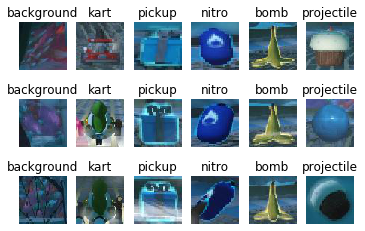

In [14]:
visualize_data()

## Defining Model Architecture and Loss

In [6]:
import torch.nn.functional as F
input = torch.tensor([[1, 2, 3, 4, 5, 6, 7],[2,2,1,2,2,2,2]], dtype=torch.float32)
b = -F.log_softmax(input, dim=1)
print(b)
a = torch.mean(-F.log_softmax(input, dim=1),dim=1)
c = torch.tensor([1,2])
tar = torch.tensor([[[[1,2]]]])
print(tar.size())
tar = tar.view(-1)
torch.mean(torch.gather(b, 1, tar.view(tar.size(0),1)))
tar.size()
torch.cuda.is_available()
torch.backends.cudnn.enabled

tensor([[6.4578, 5.4578, 4.4578, 3.4578, 2.4578, 1.4578, 0.4578],
        [1.8513, 1.8513, 2.8513, 1.8513, 1.8513, 1.8513, 1.8513]])
torch.Size([1, 1, 1, 2])


True

In [134]:
class ClassificationLoss(torch.nn.Module):
    def forward(self, input, target):
        """
        Your code here
        Compute mean(-log(softmax(input)_label))
        @input:  torch.Tensor((B,C)), where B = batch size, C = number of classes
        @target: torch.Tensor((B,), dtype=torch.int64)
        @return:  torch.Tensor((,))
        Hint: Don't be too fancy, this is a one-liner
        """
        #raise NotImplementedError('ClassificationLoss.forward')
        import torch.nn.functional as F
        target = target.view(-1) # shrink the size down to 1
        predict = -F.log_softmax(input, dim = 1)
        predict = torch.mean(torch.gather(predict, 1, target.view(target.size(0), 1)))
        
        return predict


class CNNClassifier(torch.nn.Module):
    def __init__(self):
        """
        Your code here
        """
        #raise NotImplementedError('CNNClassifier.__init__')

    def forward(self, x):
        """
        Your code here
        @x: torch.Tensor((B,3,64,64))
        @return: torch.Tensor((B,6))
        """
        raise NotImplementedError('CNNClassifier.forward')

In [0]:
from torch import save
from torch import load
from os import path

def save_model(model):
    if isinstance(model, CNNClassifier):
        return save(model.state_dict(), path.join(path.dirname(path.abspath(__file__)), 'cnn.th'))
    
    raise ValueError("model type '%s' not supported!"%str(type(model)))


def load_model():
    r = CNNClassifier()
    r.load_state_dict(load(path.join(path.dirname(path.abspath(__file__)), 'cnn.th'), map_location='cpu'))
    return r

## Tensorboard logging

In [0]:
def test_logging(train_logger, valid_logger):

    """
    Your code here.
    Finish logging the dummy loss and accuracy
    Log the loss every iteration, the accuracy only after each epoch
    Make sure to set global_step correctly, for epoch=0, iteration=0: global_step=0
    Call the loss 'loss', and accuracy 'accuracy' (no slash or other namespace)
    """

    # This is a strongly simplified training loop
    for epoch in range(10):
        torch.manual_seed(epoch)
        for iteration in range(20):
            dummy_train_loss = 0.9**(epoch+iteration/20.)
            dummy_train_accuracy = epoch/10. + torch.randn(10)
            raise NotImplementedError('Log the training loss')
        raise NotImplementedError('Log the training accuracy')
        torch.manual_seed(epoch)
        for iteration in range(10):
            dummy_validation_accuracy = epoch / 10. + torch.randn(10)
        raise NotImplementedError('Log the validation accuracy')


After implementing `test_logging()`, call it below. This should produce some plots on your tensorboard.

In [0]:
%load_ext tensorboard

In [0]:
%reload_ext tensorboard

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from torch.utils.tensorboard import SummaryWriter
ROOT_LOG_DIR = './logdir'


In [0]:
%tensorboard --logdir {ROOT_LOG_DIR} #Launch tensorboard

In [0]:
train_logger = tb.SummaryWriter(path.join('./logdir', 'train'))
valid_logger = tb.SummaryWriter(path.join('./logdir', 'test'))
test_logging(train_logger, valid_logger)

**Training and evaluation utility functions** 

Here are some implementations of useful functions for training and evaluating your models. Read these carefully. You may need to make some obvious edits before these will work.

In [0]:
def accuracy(outputs, labels):
    outputs_idx = outputs.max(1)[1].type_as(labels)
    return outputs_idx.eq(labels).float().mean()

def predict(model, inputs, device='cpu'):
    inputs = inputs.to(device)
    logits = model(inputs)
    return F.softmax(logits, -1)
    def draw_bar(axis, preds, labels=None):
    y_pos = np.arange(6)
    axis.barh(y_pos, preds, align='center', alpha=0.5)
    axis.set_xticks(np.linspace(0, 1, 10))
    
    if labels:
        axis.set_yticks(y_pos)
        axis.set_yticklabels(labels)
    else:
        axis.get_yaxis().set_visible(False)
    
    axis.get_xaxis().set_visible(False)

def visualize_predictions():
  
    model = load_model()
    model.eval()

    validation_image_path='' #enter the path 

    dataset = SuperTuxDataset(image_path=validation_image_path)

    f, axes = plt.subplots(2, 6)

    idxes = np.random.randint(0, len(dataset), size=6)

    for i, idx in enumerate(idxes):
        img, label = dataset[idx]
        preds = predict(model, img[None], device='cpu').detach().cpu().numpy()

        axes[0, i].imshow(TF.to_pil_image(img))
        axes[0, i].axis('off')
        draw_bar(axes[1, i], preds[0], LABEL_ if i == 0 else None)

    plt.show()

## Training models

The `load_data` utility below uses your implementation of the dataset class above to provide a helper function that might be useful when you train your models. You won't need to change anything inside this function. 



In [0]:
def load_data(dataset_path, data_transforms=None, num_workers=0, batch_size=128):
    dataset = SuperTuxDataset(dataset_path,data_transforms)
    return DataLoader(dataset, num_workers=num_workers, batch_size=batch_size, shuffle=True)

But you *will* need to implement `train()`, which takes an `args` object, that could have arbitrary arguments inside. We won't test your train function directly, but will instead evaluate the model it produces as output. To call `train`, you have to first create an args object, and add various attributes to it, as shown below:

In [0]:
class Args(object):
  pass

args = Args();
# Add attributes to args here, such as:
# args.learning_rate = 0.0001
# args.log_dir = './my_tensorboard_log_directory' 

Then implement `train`. Follow the instructions in the assignment.

In [0]:
def train(args):
    """
    Your code here
    """
    model = CNNClassifier()
    if args.log_dir is not None:
        train_logger = tb.SummaryWriter(path.join(args.log_dir, 'train'))
        valid_logger = tb.SummaryWriter(path.join(args.log_dir, 'valid'))

    raise NotImplementedError('train')

    save_model(model)

Now, you can call `train` with `train(args)`, where `args` contains your various favorite settings of hyperparameters and other arguments that your implementation of `train` needs.


Afterwards, you can call `predict()' and `visualize_predictions()' to evaluate your model.